In [ ]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr

In [ ]:
pd.set_option('display.max_columns', None)

# Overview

In [ ]:
# dataset link : https://www.kaggle.com/competitions/burnout-datathon-ieeecsmuj/data
df = pd.read_csv('dataset/train.csv')
df.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Championship_Points,Championship_Position,Session,year_x,sequence,rider,team,bike,position,points,shortname,circuit_name,rider_name,team_name,bike_name,Lap_Time_Seconds,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,weather,track,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,Hard,+3s,100,20,FP3,2021,16,2639,615,258,9,7.0,EMI,Misano,"Ogura, Ai",IDEMITSU Honda Team Asia,Kalex,70.667,18,0.0042,4.09,23.0,27.3,Clear,Dry,23,35,53,45,41,4,0,2018,2021,4
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,Medium,+5s,137,7,Race,1977,4,900,1,4,5,6.0,NAT,Imola,"North, Alan",?,Yamaha,103.497,23,0.0025,4.64,34.3,41.8,Raining,Wet,12,12,27,27,22,2,1,1975,1983,8
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,Hard,DNF,43,17,Race,1985,2,1160,1,2,10,1.0,SPA,Jarama,"Biliotti, Fabio",?,Honda,78.400,19,0.0044,2.67,20.6,27.1,Cloudy,Dry,22,23,45,43,10,0,0,1982,1989,8
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,Hard,DNS,234,13,Race,2007,16,1693,206,15,11,5.0,AUS,Phillip Island,"Locatelli, Roberto",Metis Gilera,Gilera,81.338,12,0.0034,4.69,20.9,29.1,Clear,Dry,23,35,192,172,155,16,9,1994,2009,16
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,Medium,DNS,306,8,FP3,2018,7,2450,568,6,6,10.0,CAT,Catalunya,"Binder, Brad",Red Bull KTM Ajo,KTM,108.626,23,0.0017,4.84,29.1,43.4,Cloudy,Dry,22,31,175,146,132,29,17,2011,2021,11


In [ ]:
# checking for dataset structure
print("Number of rows :" , df.shape[0])
print("Number of columns :" , df.shape[1])

Number of rows : 1914056
Number of columns : 45


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 45 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition                  object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

In [ ]:
# Checking for categorical and numerical columns

num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("No. of numerical columns : " , len(num_cols))
print("No. of categorical columns : " , len(cat_cols))

No. of numerical columns :  32
No. of categorical columns :  13


Target column is Lap_Time_Seconds.

In [ ]:
# time range of data
print('Starting Year :' , df['min_year'].min())
print('Ending Year :' , df['min_year'].max())


Starting Year : 1949
Ending Year : 2021


# Data Cleaning

### Missing Values & Duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unique ID                               0
Rider_ID                                0
category_x                              0
Circuit_Length_km                       0
Laps                                    0
Grid_Position                           0
Avg_Speed_kmh                           0
Track_Condition                         0
Humidity_%                              0
Tire_Compound_Front                     0
Tire_Compound_Rear                      0
Penalty                            321292
Championship_Points                     0
Championship_Position                   0
Session                                 0
year_x                                  0
sequence                                0
rider                                   0
team                                    0
bike                                    0
position                                0
points                                  0
shortname                               0
circuit_name                      

Only one column (Penalty) contains missing values in th entire dataset. Now we will find out what percentage of missing data is contained in (Penalty) column.

Missing amount of data (Penalty) : 20.17
Non Null values of data (Penalty): 79.83


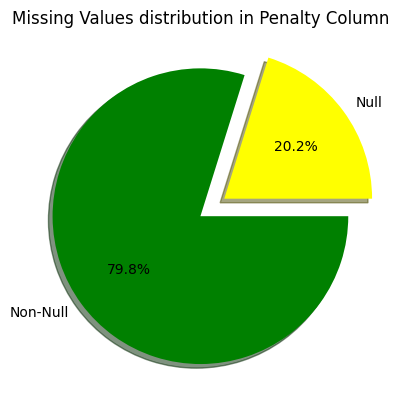

In [ ]:
missing_percentage = (df['Penalty'].isnull().sum() / df['Penalty'].count()) *100
non_null_values = 100 - missing_percentage

print(f"Missing amount of data (Penalty) : {missing_percentage:.2f}" )
print(f"Non Null values of data (Penalty): {non_null_values:.2f}" , )

plt.pie(
        [ missing_percentage , non_null_values] , 
        labels = ['Null' , 'Non-Null'],
        autopct='%1.1f%%',
        explode = [0.2, 0],
        colors=['yellow' , 'green'],
        shadow=True
        )
plt.title("Missing Values distribution in Penalty Column")
plt.show()


Now we will find out the cause of missingness in the data.

### Handling Inconsitencies

In [ ]:
cat_cols

Index(['category_x', 'Track_Condition', 'Tire_Compound_Front',
       'Tire_Compound_Rear', 'Penalty', 'Session', 'shortname', 'circuit_name',
       'rider_name', 'team_name', 'bike_name', 'weather', 'track'],
      dtype='object')

In [ ]:
df[cat_cols].head()

,category_x,Track_Condition,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Session,shortname,circuit_name,rider_name,team_name,bike_name,weather,track
0,Moto2,Wet,Hard,Hard,+3s,FP3,EMI,Misano,"Ogura, Ai",IDEMITSU Honda Team Asia,Kalex,Clear,Dry
1,Moto2,Wet,Soft,Medium,+5s,Race,NAT,Imola,"North, Alan",?,Yamaha,Raining,Wet
2,Moto3,Dry,Soft,Hard,DNF,Race,SPA,Jarama,"Biliotti, Fabio",?,Honda,Cloudy,Dry
3,Moto3,Wet,Soft,Hard,DNS,Race,AUS,Phillip Island,"Locatelli, Roberto",Metis Gilera,Gilera,Clear,Dry
4,MotoGP,Wet,Hard,Medium,DNS,FP3,CAT,Catalunya,"Binder, Brad",Red Bull KTM Ajo,KTM,Cloudy,Dry


In [ ]:
# checking for any inconsistency 
for col in cat_cols:
    print(col)
    print(df[col].unique())

category_x
['Moto2' 'Moto3' 'MotoGP']
Track_Condition
['Wet' 'Dry']
Tire_Compound_Front
['Hard' 'Soft' 'Medium']
Tire_Compound_Rear
['Hard' 'Medium' 'Soft']
Penalty
['+3s' '+5s' 'DNF' 'DNS' 'Ride Through' nan]
Session
['FP3' 'Race' 'FP2' 'Qualifying' 'FP1' 'FP4' 'Sprint']
shortname
['EMI' 'NAT' 'SPA' 'AUS' 'CAT' 'VAL' 'MAL' 'RSA' 'JPN' 'WGER' 'FRA' 'NED'
 'EGER' 'AME' 'GBR' 'RIO' 'ARG' 'ITA' 'TCH' 'CZE' 'EUR' 'AUT' 'RSM' 'SWE'
 'BEL' 'GER' 'POR' 'JUG' 'INP' 'CHN' 'ULST' 'VDU' 'FIN' 'BRA' 'QAT' 'ARA'
 'USA' 'INA' 'TT' 'VEN' 'ANC' 'STY' 'IMO' 'TUR' 'HUN' 'THA' 'PAC' 'DOH'
 'MAD' 'TER' 'SWI' 'FIM' 'CAN']
circuit_name
['Misano' 'Imola' 'Jarama' 'Phillip Island' 'Catalunya' 'Ricardo Tormo'
 'Sepang' 'Kyalami' 'Motegi' 'Jerez' 'Hockenheim' 'Paul Ricard' 'Assen'
 'Sachsenring' 'Le Mans' 'Texas' 'Donington Park' 'Shah Alam'
 'Nelson Piquet' 'Río Hondo' 'Mugello' 'Brno' 'Nurburgring' 'Salzburgring'
 'Oscar A. Galvez' 'Anderstorp' 'Monza' 'Spa-Francorchamps' 'Estoril'
 'Silverstone' 'Rijeka' 'In

In [ ]:
df['shortname'].unique()

array(['EMI', 'NAT', 'SPA', 'AUS', 'CAT', 'VAL', 'MAL', 'RSA', 'JPN',
       'WGER', 'FRA', 'NED', 'EGER', 'AME', 'GBR', 'RIO', 'ARG', 'ITA',
       'TCH', 'CZE', 'EUR', 'AUT', 'RSM', 'SWE', 'BEL', 'GER', 'POR',
       'JUG', 'INP', 'CHN', 'ULST', 'VDU', 'FIN', 'BRA', 'QAT', 'ARA',
       'USA', 'INA', 'TT', 'VEN', 'ANC', 'STY', 'IMO', 'TUR', 'HUN',
       'THA', 'PAC', 'DOH', 'MAD', 'TER', 'SWI', 'FIM', 'CAN'],
      dtype=object)

In [ ]:
df['shortname'] = df['shortname'].apply(lambda x : "GER" if x in ["WGER" , "EGER"] else x)

In [ ]:
df['bike_name'] = df['bike_name'].apply(lambda x : "Transformiers" if x=="Transfiormers" else x)
df['bike_name'] = df['bike_name'].apply(lambda x : "Tech3" if x=="Tech 3" else x)
df['bike_name'] = df['bike_name'].apply(lambda x : "Forward Yamaha" if x=="Yamaha Forward" else x)

In [ ]:
df['rider_fname'] = df['rider_name'].apply(lambda x: x.split(',')[1])
df['rider_fname'] = df['rider_fname'].str.strip()
df['rider_lname'] = df['rider_name'].apply(lambda x: x.split(',')[0])
df['rider_full_name'] = df['rider_fname'] + " " +df['rider_lname']

In [ ]:
df['team_name'] = df['team_name'].apply(lambda x : '18 Garage Racing' if x in  ['18 Garage Racing', '18 Garage Racing Team', '18 Grage Racing'] else x)
df['team_name'] = df['team_name'].apply(lambda x : 'ADAC Nordbayern E.V.' if x in  ['Adac Nordbayern E.V.', 'Adac Nordbayern e.v.', 'ADAC Nordbayern E.V.'] else x)
df['team_name'] = df['team_name'].apply(lambda x : 'ADAC Sachsen Juniors' if x in  ['Adac Sachsen Junior Team', 'ADAC Sachsen Juniors'] else x)
df['team_name'] = df['team_name'].apply(lambda x : 'Andalucia-GFC-Mas' if x in  ['Andalucia - GFC - MAS', 'Andalucia - GFC - Mas', 'Andalucia-GFC-Mas'] else x)


In [ ]:
df.rename(columns={'Track_Condition':'Track_Condition_surface' , 
                   'track':'track_temperature'},
                     inplace=True )

In [ ]:
# reassigning 
num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [ ]:
print("Unqiue values in the column: ")
print(df['Penalty'].unique())

Unqiue values in the column: 
['+3s' '+5s' 'DNF' 'DNS' 'Ride Through' nan]


There could be various reasons for the values to be NaN:
- Rider did not get any penalty.
- The penalty was not recorded.

We will assume that the rider did not get any penalty.

In [ ]:
# Imputing missing values.

df['Penalty'] = df['Penalty'].fillna("None")

Imputed NaN values as None means no penalty was were conceeded by the rider.

# EDA - Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.columns

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition_surface',
       'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track_temperature', 'air', 'ground', 'starts', 'finishes',
       'with_points', 'podiums', 'wins', 'min_year', 'max_year',
       'years_active', 'rider_fname', 'rider_lname', 'rider_full_name'],
      dtype='object')

In [ ]:
def create_descriptive_stats(cols):
    descr_dict = {
        "feature":[],
        "mean":[],
        "median":[],
        "std_deviation":[],
        "min":[],
        "max":[],
    }

    for col in cols:
        descr_dict['feature'].append(col)
        descr_dict['mean'].append(df[col].mean())
        descr_dict['median'].append(df[col].median())
        descr_dict['std_deviation'].append(df[col].std())
        descr_dict['min'].append(df[col].min())
        descr_dict['max'].append(df[col].max())
    
    return pd.DataFrame(descr_dict)

def outlier_detection(col):
    q1 = np.percentile(col , 25)
    q2 =  np.percentile(col , 50)    
    q3 = np.percentile(col , 75)

    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr 
    upper_bound = q3 + 1.5 * iqr

    # print(    pd.DataFrame([{
    #     "Q1":q1,
    #     "Q2":q2,
    #     "Q3":q3,
    #     "Lower Bound": lower_bound,
    #     "Upper Bound":upper_bound
    # }]))

    return lower_bound , upper_bound

### Numerical Columns

In [ ]:
# Unique number of riders
print("number of unique riders : " ,len(df['Rider_ID'].unique()) )

number of unique riders :  8999


In [ ]:
create_descriptive_stats(num_cols)

,feature,mean,median,std_deviation,min,max
0,Unique ID,1.367777e+06,1.368276e+06,789062.957285,0.0000,2734366.000
1,Rider_ID,5.509394e+03,5.514000e+03,2597.185731,1000.0000,9998.000
2,Circuit_Length_km,4.701208e+00,4.702000e+00,0.691097,3.5000,5.900
3,Laps,2.150189e+01,2.200000e+01,2.293772,18.0000,25.000
4,Grid_Position,1.149819e+01,1.200000e+01,6.334418,1.0000,22.000
5,Avg_Speed_kmh,2.496328e+02,2.496500e+02,57.735248,150.0000,350.000
6,Humidity_%,5.951643e+01,6.000000e+01,17.337066,30.0000,89.000
7,Championship_Points,1.744615e+02,1.740000e+02,100.948476,0.0000,349.000
8,Championship_Position,1.254921e+01,1.300000e+01,6.913828,1.0000,24.000
9,year_x,1.997913e+03,2.001000e+03,17.085656,1949.0000,2021.000


#### Outlier Detection

In [ ]:

num_cols_hist = ['Circuit_Length_km', 'Laps', 'Grid_Position',
       'Avg_Speed_kmh', 'Humidity_%', 'Championship_Points',
       'Championship_Position', 'sequence',   
       'position', 'points', 'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'air',
       'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins',
        'years_active']
print("Number of columns : ", len(num_cols_hist))

Number of columns :  24


In [ ]:
rows = []
for col in num_cols_hist:
    lower_bound , upper_bound = outlier_detection(df[col])
    number_of_outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)].shape[0]
    outlier_percentage =  (number_of_outliers/df.shape[0]) *100


    rows.append([col, lower_bound , upper_bound , number_of_outliers , outlier_percentage])

outlier_df = pd.DataFrame(
    data=rows,
    columns = [ "Feature", "lower bound" , "upper bound" , "no of outliers" , "outlier %"],
).set_index("Feature")

outlier_df_actual = outlier_df[outlier_df['no of outliers'] > 0]
outlier_df_actual

,lower bound,upper bound,no of outliers,outlier %
Feature,,,,
position,-13.5,30.5,4809,0.251247
points,-12.0,20.0,48565,2.537282
starts,-131.5,312.5,24838,1.297663
finishes,-107.0,261.0,44948,2.348312
with_points,-116.5,239.5,44268,2.312785
podiums,-24.0,40.0,155136,8.105092
wins,-10.5,17.5,187185,9.779494
years_active,-5.5,22.5,13950,0.728819


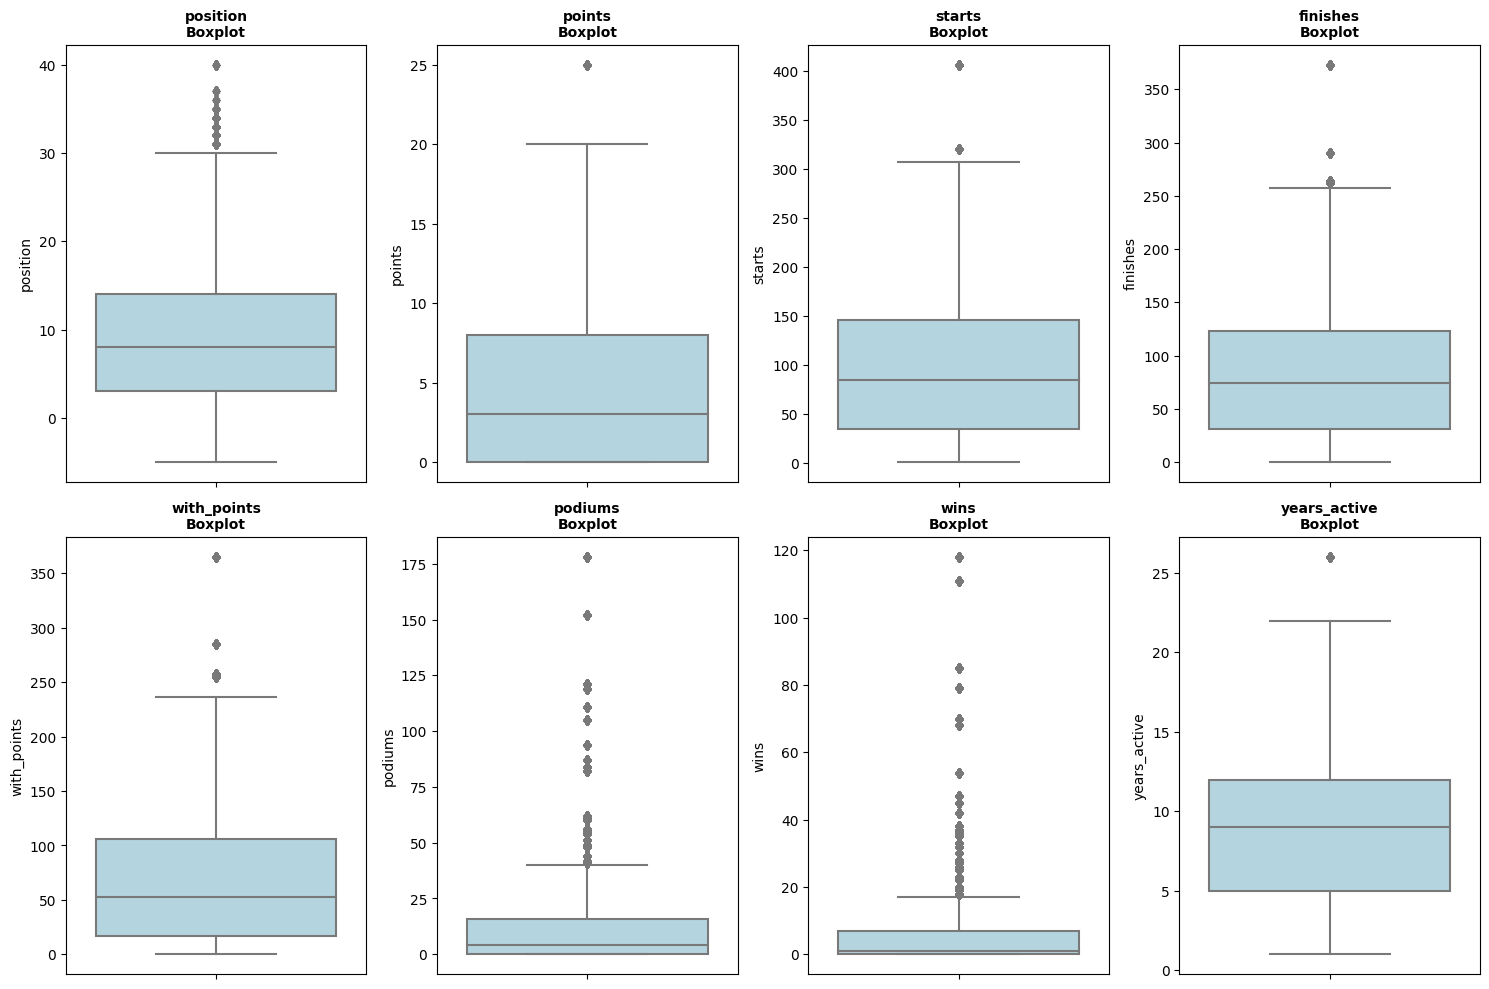

In [ ]:
outlier_df_cols = outlier_df_actual.index
fig , axes = plt.subplots(2 , 4 , figsize = (15 , 10))

for i , col in enumerate(outlier_df_cols[:4]):
    sns.boxplot(y=df[col] , ax=axes[0,i] , color="lightblue")
    axes[0, i].set_title(f"{col}\nBoxplot", fontsize=10, fontweight="bold")
for i , col in enumerate(outlier_df_cols[4:]):
    sns.boxplot(y=df[col] , ax=axes[1,i] , color="lightblue")
    axes[1, i].set_title(f"{col}\nBoxplot", fontsize=10, fontweight="bold")
plt.tight_layout()
plt.show()

- Position columns have valid outliers there are times when races have 40 riders.
- Also for points column riders can achieve 25 points winning championships.
- Legendary riders can have high number of starts hence it is also valid.
- Consistent riders over long careers can have more number of Finishes.
- Top riders riders scoring point in most races can cause outliers in with_points but it is valid.
- Elite riders can have more Podiums then others hence more Wins also.
- Legenedary riders have long careers.

#### Correlation

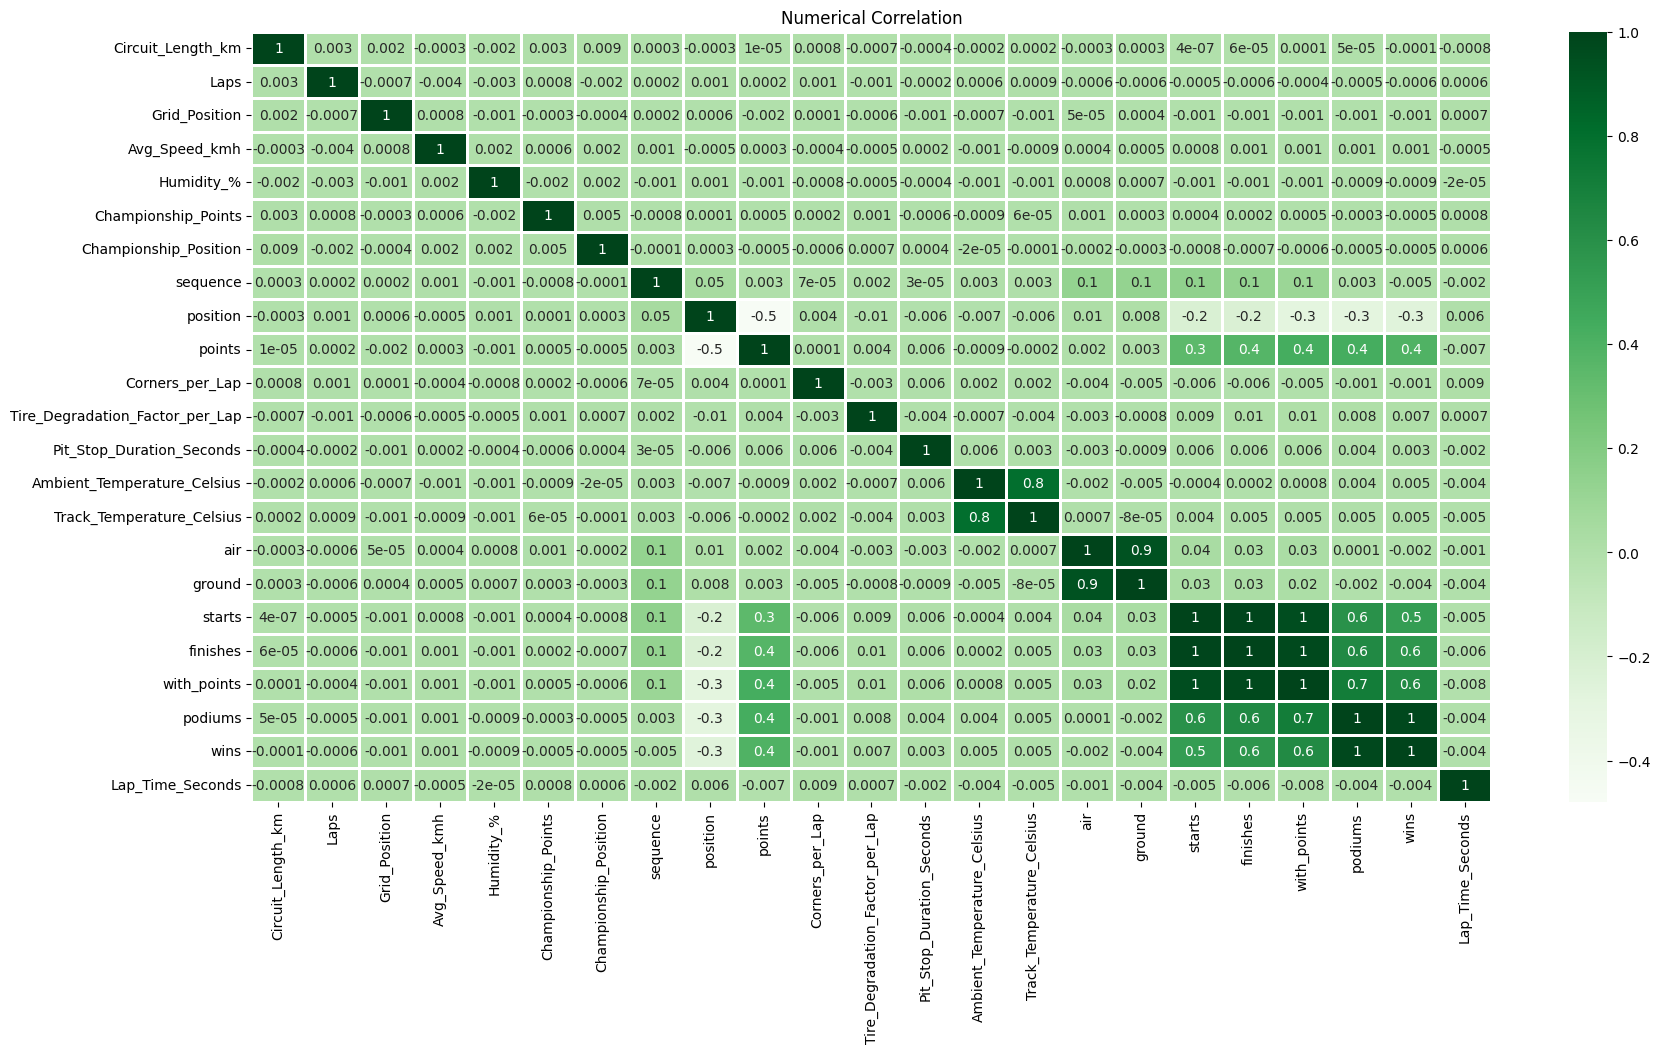

In [ ]:
corr_cols = [ 'Circuit_Length_km', 'Laps', 'Grid_Position',
       'Avg_Speed_kmh', 'Humidity_%', 'Championship_Points',
       'Championship_Position', 'sequence', 
       'position', 'points',  'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'air',
       'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins','Lap_Time_Seconds'
      ]

corr_matrix = df[corr_cols].corr()


plt.figure(figsize=(20 , 10))
sns.heatmap(corr_matrix , annot=True , cmap="Greens"  ,fmt='.1g'  , linewidths=1)
plt.title("Numerical Correlation")
plt.show()

 - Longer circuits takes more time to complete a singel lap
 - High Humidty reduces Lap Time  and have slightly poisitve correlation with Avg Speed.
 - Track Temperature Reduces Lap Time but have slightly negatice correaltion with avg speed. Same can be said for Ambient Temperature.
 - Increase in track temperature reduces tire degradation factor per lap.
 - starts , finishes , with_points , podiums , wins are strongly (positive) correlated with each other.
 - position is in stong negative correlation with starts , finishes , with_points , podiums , wins viz for points.
 - air and ground have strong positive correlation.
 - strangely sequence also have good positive correaltion with air.

#### Data Distribution

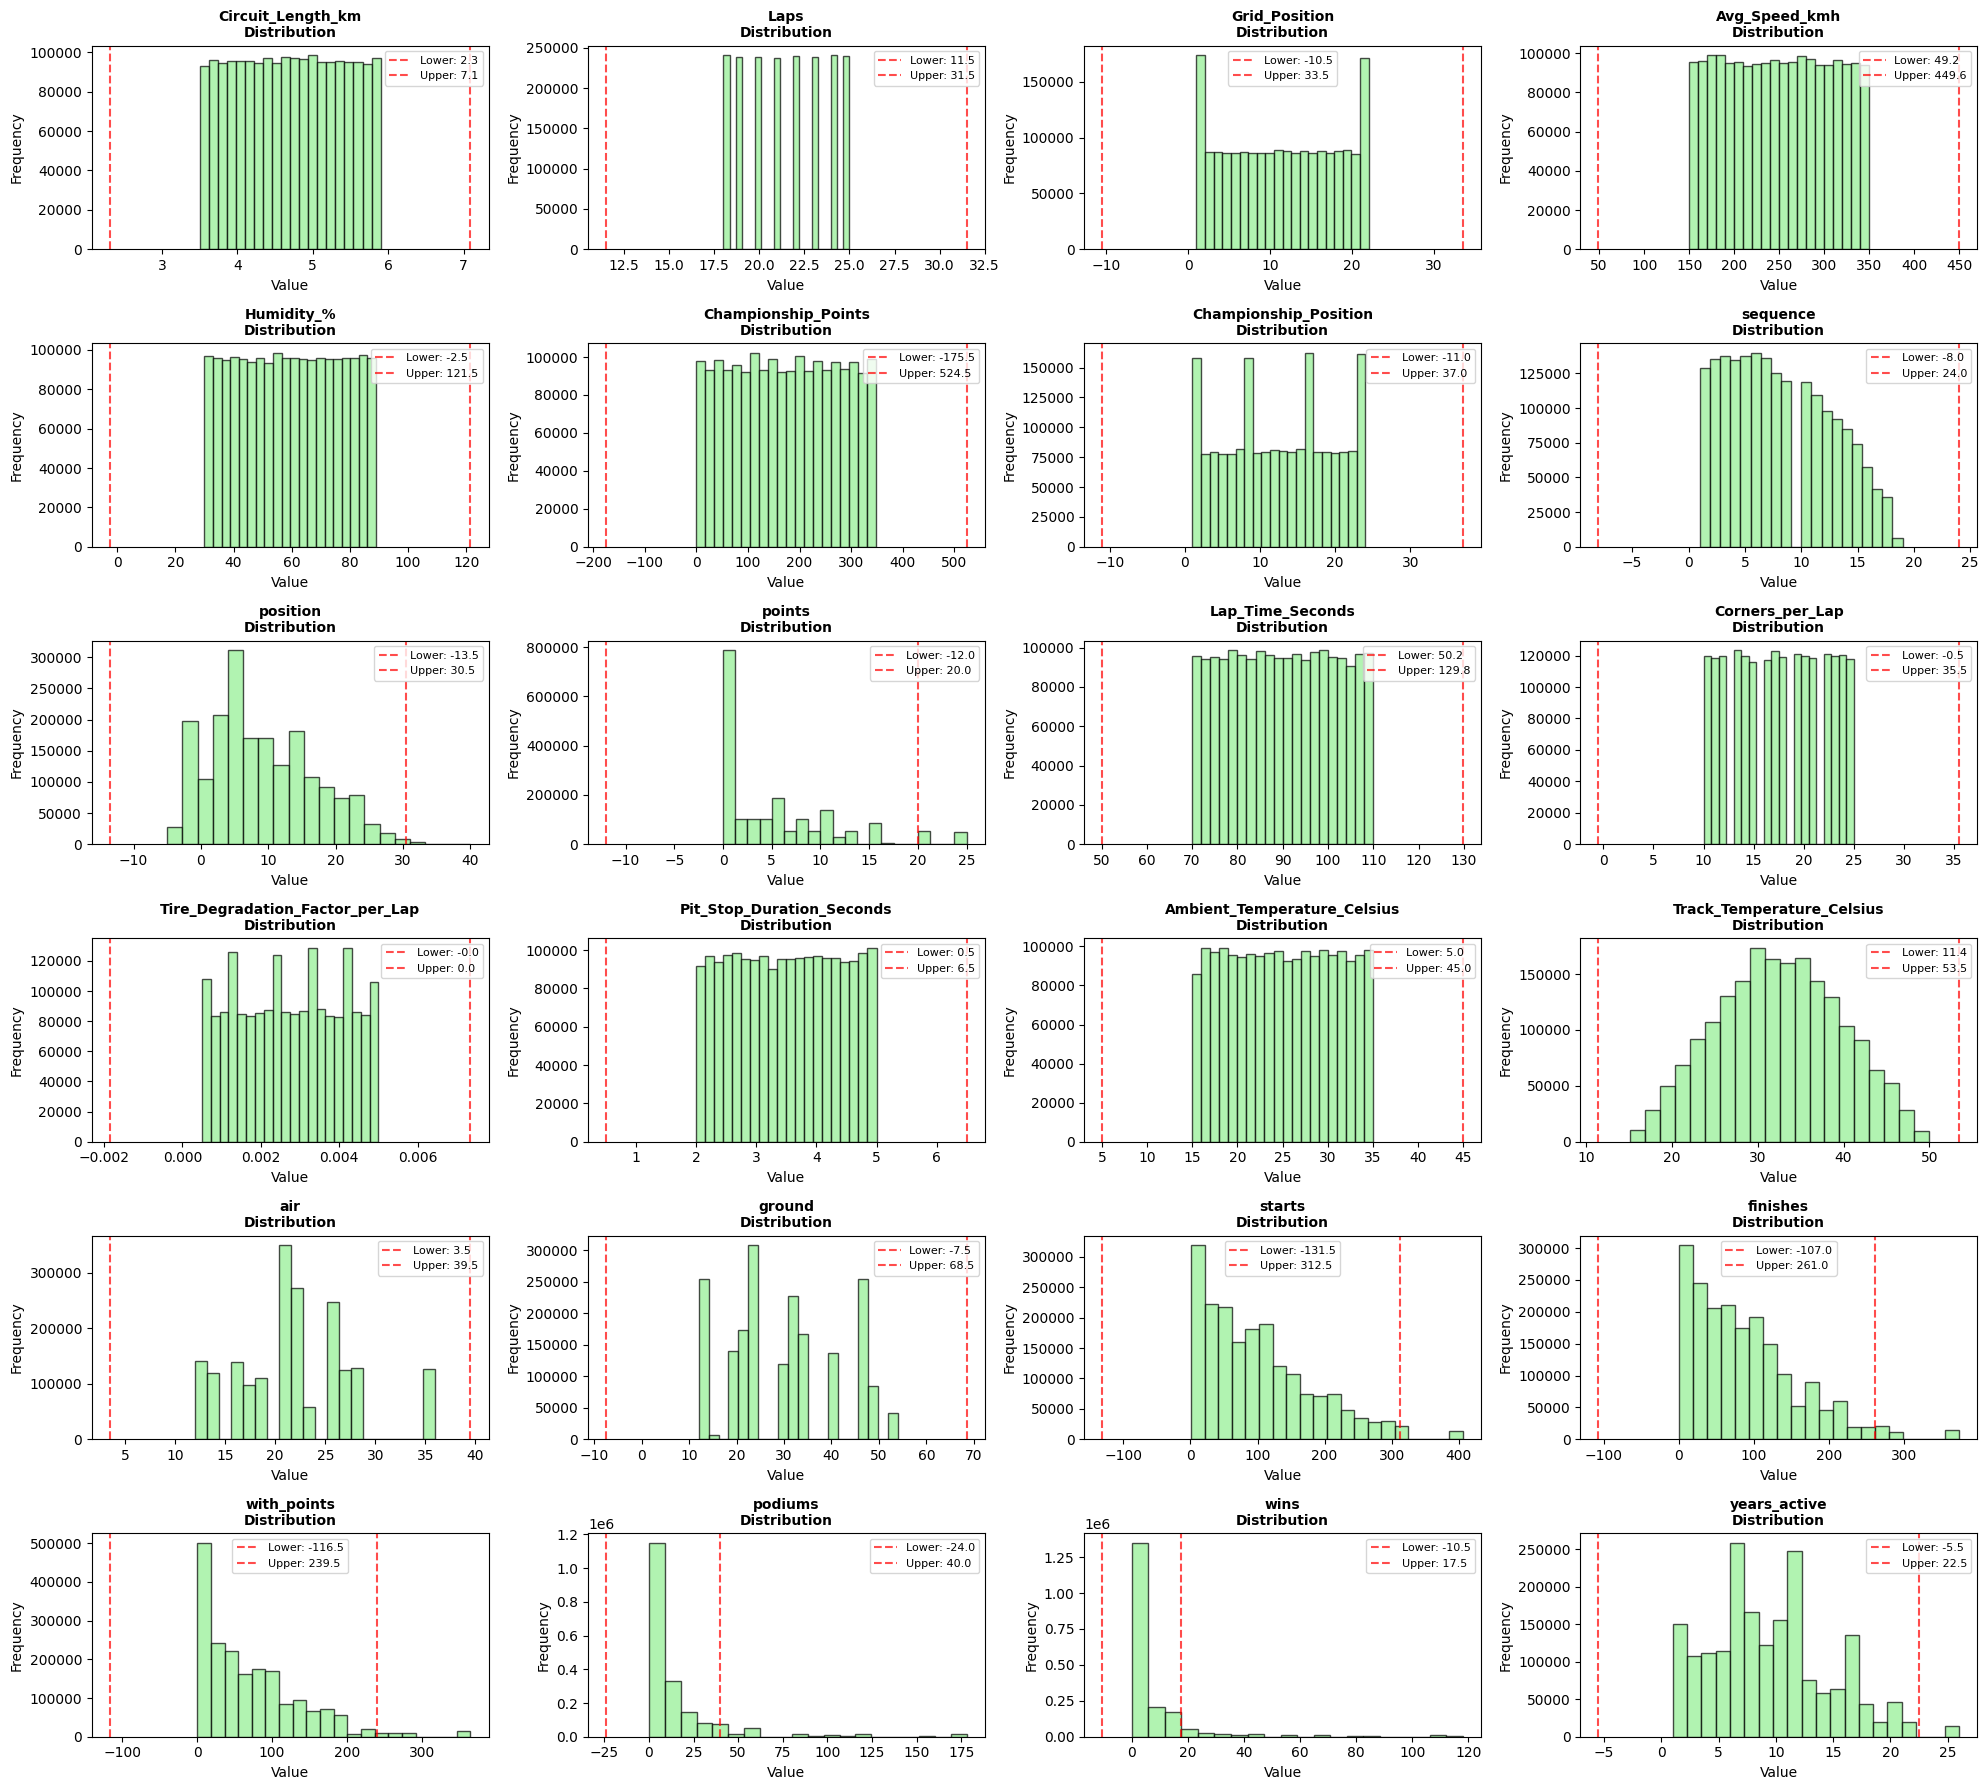

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(20, 18))
axes = axes.flatten()  # Flatten for easy iteration

for i, col in enumerate(num_cols_hist[:24]):
    ax = axes[i]
    
    # Plot histogram
    ax.hist(
        df[col].dropna(),
        bins=20,
        alpha=0.7,
        color="lightgreen",
        edgecolor="black"
    )

    # Add vertical lines for outlier boundaries
    if col in outlier_df.index:
        lower_bound = outlier_df.loc[col, "lower bound"]
        upper_bound = outlier_df.loc[col, "upper bound"]

        ax.axvline(
            lower_bound,
            color="red",
            linestyle="--",
            alpha=0.7,
            label=f"Lower: {lower_bound:.1f}"
        )
        ax.axvline(
            upper_bound,
            color="red",
            linestyle="--",
            alpha=0.7,
            label=f"Upper: {upper_bound:.1f}"
        )
        ax.legend(fontsize=8)

    # Titles and labels
    ax.set_title(f"{col}\nDistribution", fontsize=10, fontweight="bold")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Generally most of the features have uniform and discrete distributions.
- Some of the columns have are left skewed like with_points , finishes.
- Track temperature is normally distributed.
- Our target column Lap_Time_Seconds have a uniform distribution.

### Categorical Columns

In [ ]:
cat_cols

Index(['category_x', 'Track_Condition_surface', 'Tire_Compound_Front',
       'Tire_Compound_Rear', 'Penalty', 'Session', 'shortname', 'circuit_name',
       'rider_name', 'team_name', 'bike_name', 'weather', 'track_temperature',
       'rider_fname', 'rider_lname', 'rider_full_name'],
      dtype='object')

In [ ]:
num_cols

Index(['Unique ID', 'Rider_ID', 'Circuit_Length_km', 'Laps', 'Grid_Position',
       'Avg_Speed_kmh', 'Humidity_%', 'Championship_Points',
       'Championship_Position', 'year_x', 'sequence', 'rider', 'team', 'bike',
       'position', 'points', 'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'air',
       'ground', 'starts', 'finishes', 'with_points', 'podiums', 'wins',
       'min_year', 'max_year', 'years_active'],
      dtype='object')

#### Data Distribution

8


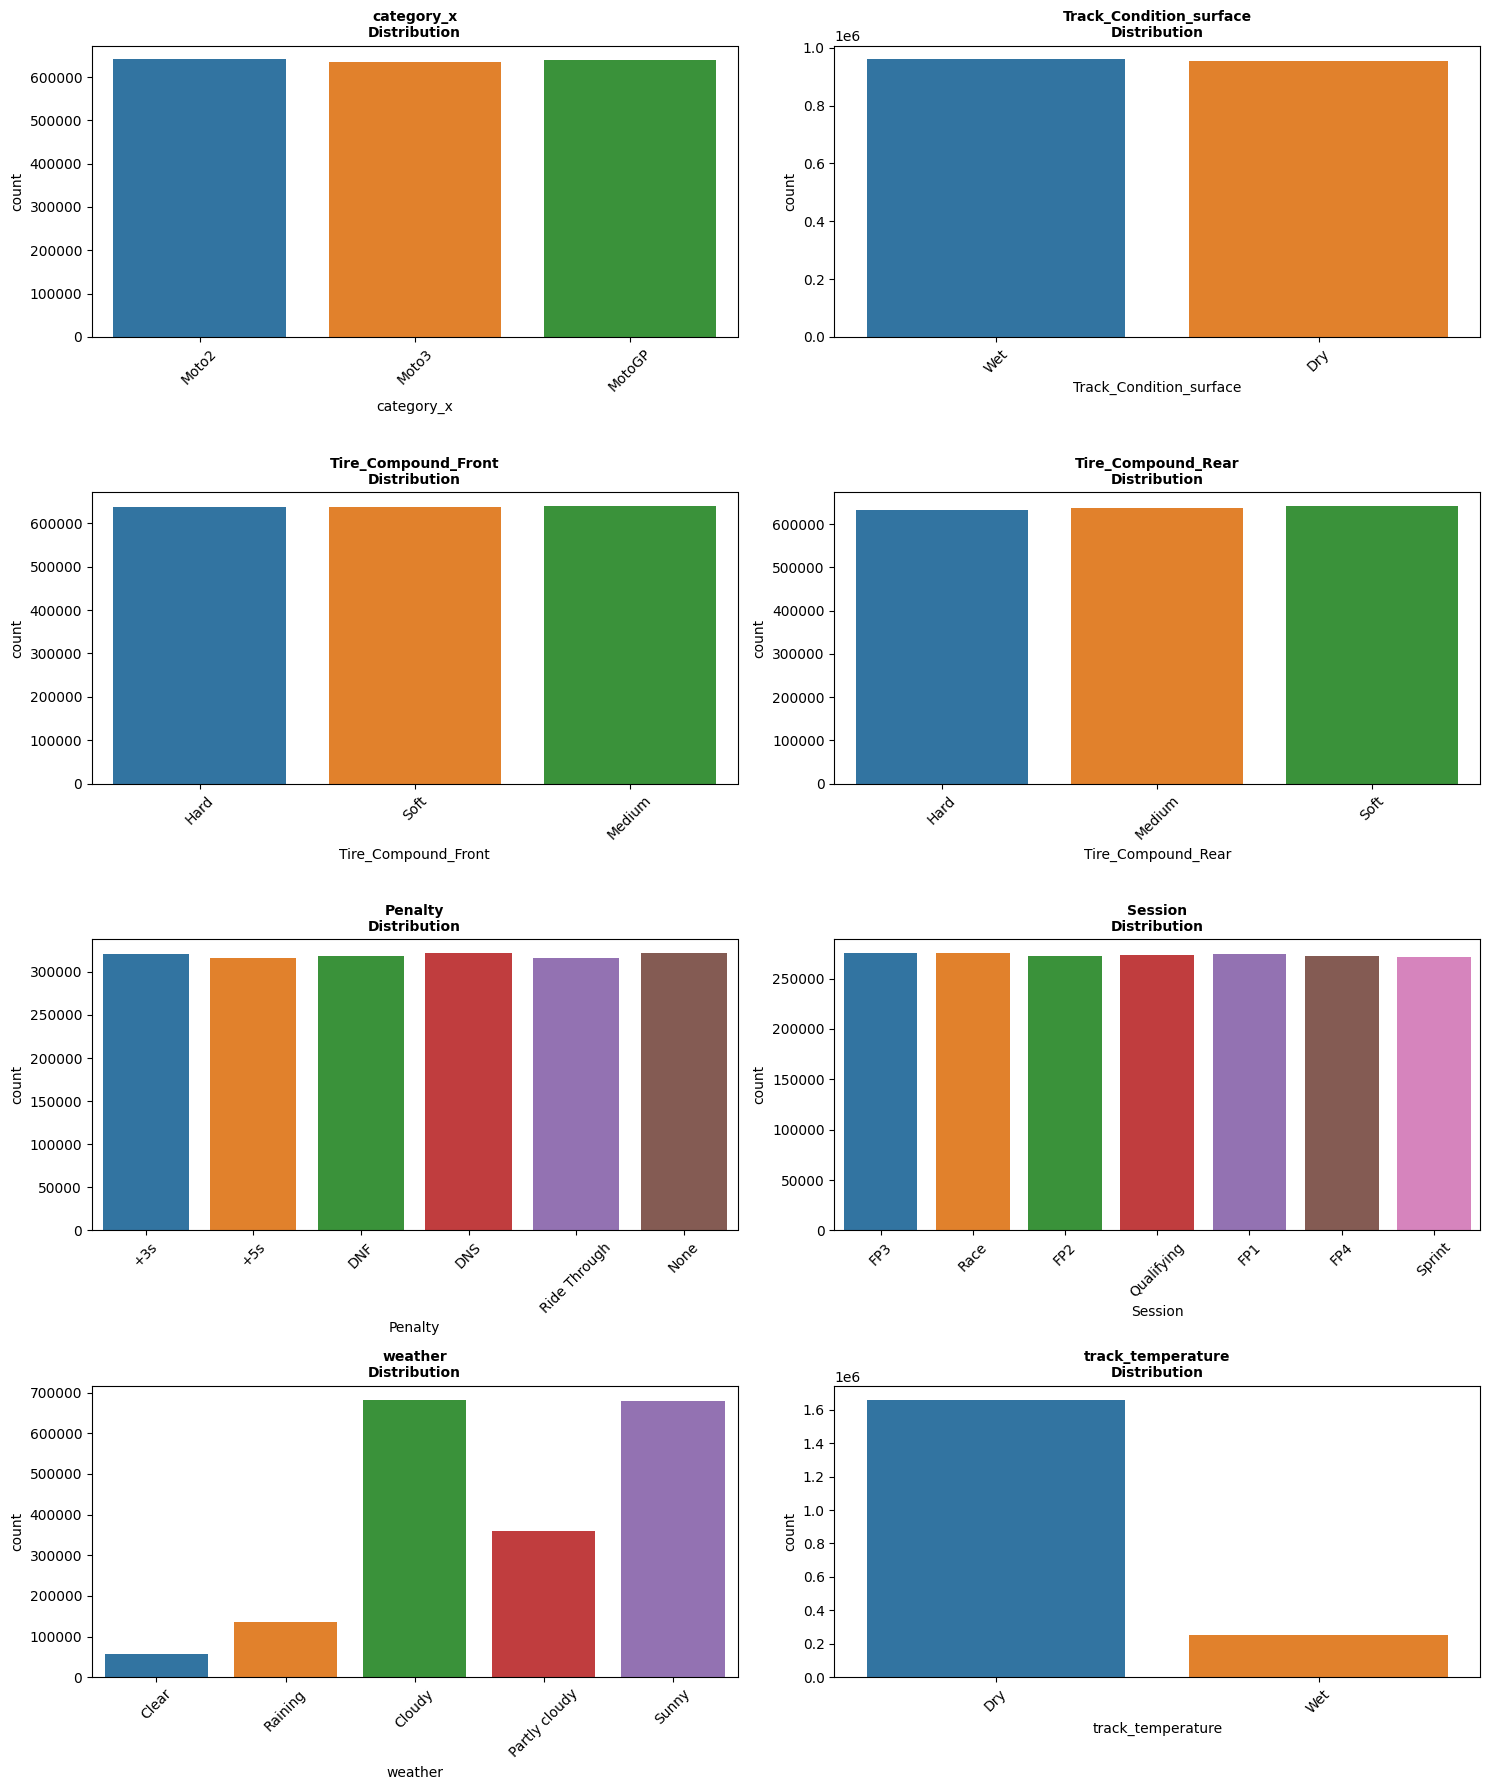

In [ ]:
# List of columns to plot
cols = ['category_x', 'Track_Condition_surface', 'Tire_Compound_Front',
        'Tire_Compound_Rear', 'Penalty', 'Session', 
        'weather', 'track_temperature']
print(len(cols)) 

# Create a 5x2 subplot grid
fig, axes = plt.subplots(4, 2, figsize=(15, 18))  # increased height for better spacing

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in its corresponding subplot
for i, col in enumerate(cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col}\nDistribution", fontsize=10, fontweight="bold")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (if cols < 10)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- For all the features we have balanced records.
- wether and and track temperature records are imbalanced.
- We have more records of dry track temperature that is ideal ofr racing.
- we have more cloudy and sunny records.

In [ ]:
df.columns

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition_surface',
       'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track_temperature', 'air', 'ground', 'starts', 'finishes',
       'with_points', 'podiums', 'wins', 'min_year', 'max_year',
       'years_active', 'rider_fname', 'rider_lname', 'rider_full_name'],
      dtype='object')

In [ ]:
# numeber of unique riders
print("Unique No. riders : " , len(df['rider_full_name'].unique()))
print("Unique No. circuits : " , len(df['circuit_name'].unique()))
print("Unique No. Teams : " , len(df['team_name'].unique()))
print("Unique No. Bike : " , len(df['bike_name'].unique()))

Unique No. riders :  2695
Unique No. circuits :  70
Unique No. Teams :  960
Unique No. Bike :  298


## Multivariate Analysis

### Categorical vs Numerical

In [ ]:
cat_cols

Index(['category_x', 'Track_Condition_surface', 'Tire_Compound_Front',
       'Tire_Compound_Rear', 'Penalty', 'Session', 'shortname', 'circuit_name',
       'rider_name', 'team_name', 'bike_name', 'weather', 'track_temperature',
       'rider_fname', 'rider_lname', 'rider_full_name'],
      dtype='object')

#### Distribution Against Target

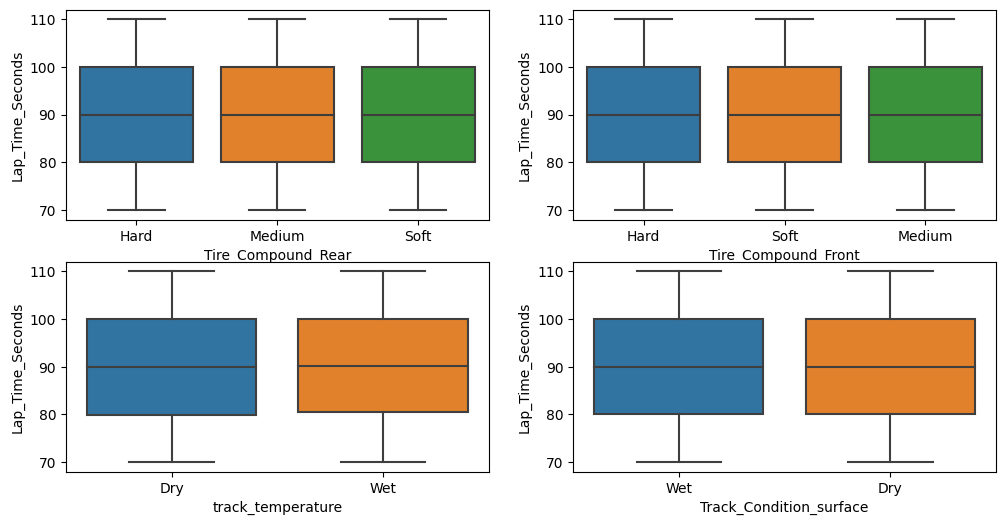

In [ ]:
fig , axes = plt.subplots(2 ,  2 , figsize=(12, 6) )
sns.boxplot(x='Tire_Compound_Rear', y='Lap_Time_Seconds', data=df , ax=axes[0 , 0])
sns.boxplot(x='Tire_Compound_Front', y='Lap_Time_Seconds', data=df , ax=axes[0 , 1])
sns.boxplot(x='track_temperature', y='Lap_Time_Seconds', data=df , ax=axes[1 , 0])
sns.boxplot(x='Track_Condition_surface', y='Lap_Time_Seconds', data=df , ax=axes[1 , 1])
plt.show()

In [ ]:
print(df[['Tire_Compound_Front' , 'Avg_Speed_kmh' , 'Lap_Time_Seconds']].groupby(['Tire_Compound_Front']).mean())
print('\n')
print(df[['Tire_Compound_Rear' , 'Avg_Speed_kmh' , 'Lap_Time_Seconds']].groupby(['Tire_Compound_Rear']).mean())

                     Avg_Speed_kmh  Lap_Time_Seconds
Tire_Compound_Front                                 
Hard                    250.007546         90.002916
Medium                  249.176570         90.012645
Soft                    249.715969         89.990761


                    Avg_Speed_kmh  Lap_Time_Seconds
Tire_Compound_Rear                                 
Hard                   250.055610         89.980643
Medium                 249.642280         90.008715
Soft                   249.205926         90.016741


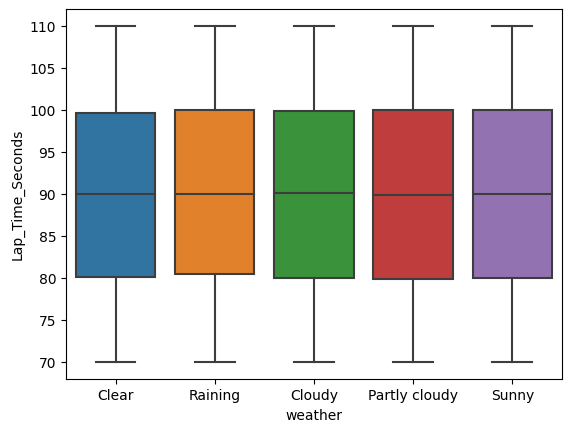

In [ ]:
sns.boxplot(data=df , x="weather" , y='Lap_Time_Seconds')
plt.show()

In [ ]:
print(df[['weather' , 'Avg_Speed_kmh' , 'Lap_Time_Seconds']].groupby(['weather']).mean())

               Avg_Speed_kmh  Lap_Time_Seconds
weather                                       
Clear             249.942883         89.957726
Cloudy            249.674990         89.970092
Partly cloudy     249.451441         89.980754
Raining           249.513961         90.186498
Sunny             249.683461         90.012694


- Tire Compunds have a minor effect on lap time and avg speed.
- Weather have negligible effect on Lap Time and Avg Speed.
- Track Temperature and conditions have almost identical results.

#### Bikes and Teams

C:\Users\windows\AppData\Local\Temp\ipykernel_20848\3182641391.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lap_time_df = df.groupby('bike_name').mean().sort_values(by='Lap_Time_Seconds' , ascending=True).head(10)
C:\Users\windows\AppData\Local\Temp\ipykernel_20848\3182641391.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  speed_df = df.groupby('bike_name').mean().sort_values(by='Avg_Speed_kmh' , ascending=False).head(10)


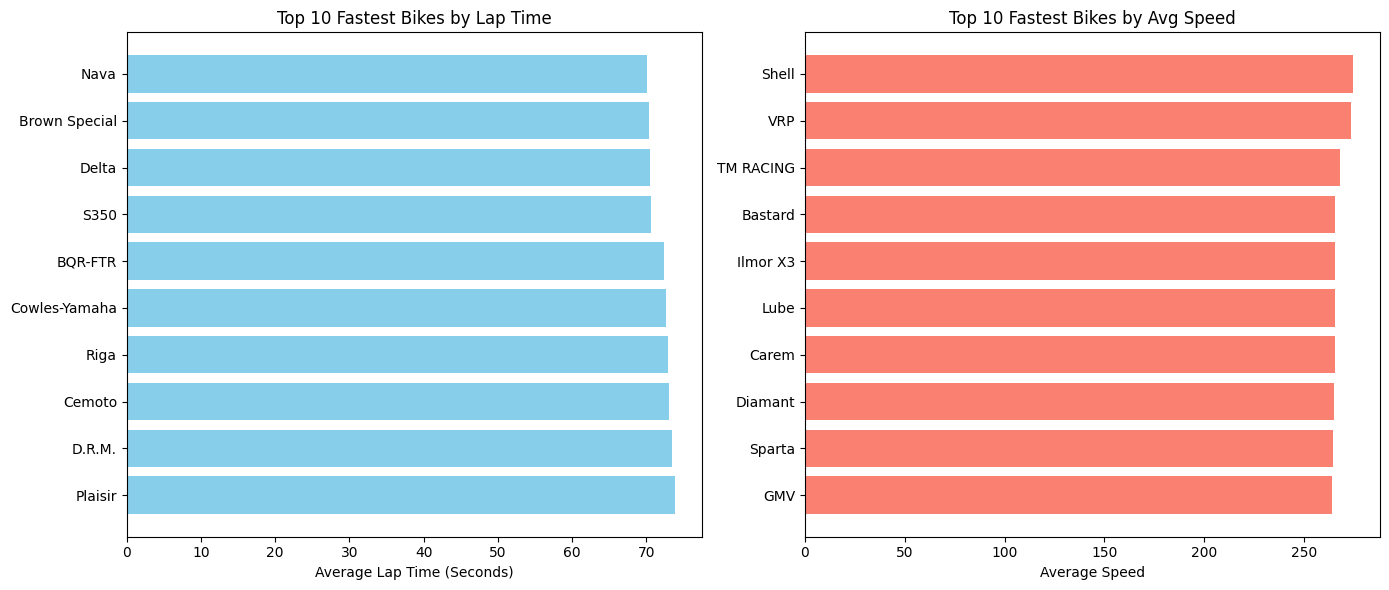

In [ ]:

# Get top 10 fastest bikes by average lap time
lap_time_df = df.groupby('bike_name').mean().sort_values(by='Lap_Time_Seconds' , ascending=True).head(10)

# Get average speeds for the same bikes
speed_df = df.groupby('bike_name').mean().sort_values(by='Avg_Speed_kmh' , ascending=False).head(10)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot lap time
axes[0].barh(lap_time_df.index, lap_time_df['Lap_Time_Seconds'], color='skyblue')
axes[0].set_xlabel('Average Lap Time (Seconds)')
axes[0].set_title('Top 10 Fastest Bikes by Lap Time')
axes[0].invert_yaxis()

# Plot average speed
axes[1].barh(speed_df.index, speed_df['Avg_Speed_kmh'], color='salmon')
axes[1].set_xlabel('Average Speed')
axes[1].set_title('Top 10 Fastest Bikes by Avg Speed')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


- Nava has lowest mena Lap Time followed by Brown Special, Delta and S350.
- Shell has fastest Mean avg speed followed by VRP and TM racing. 

C:\Users\windows\AppData\Local\Temp\ipykernel_20848\688356894.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lap_time_df = df.groupby('team_name').mean().sort_values(by='Lap_Time_Seconds' , ascending=True).head(10)
C:\Users\windows\AppData\Local\Temp\ipykernel_20848\688356894.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  speed_df = df.groupby('team_name').mean().sort_values(by='Avg_Speed_kmh' , ascending=False).head(10)


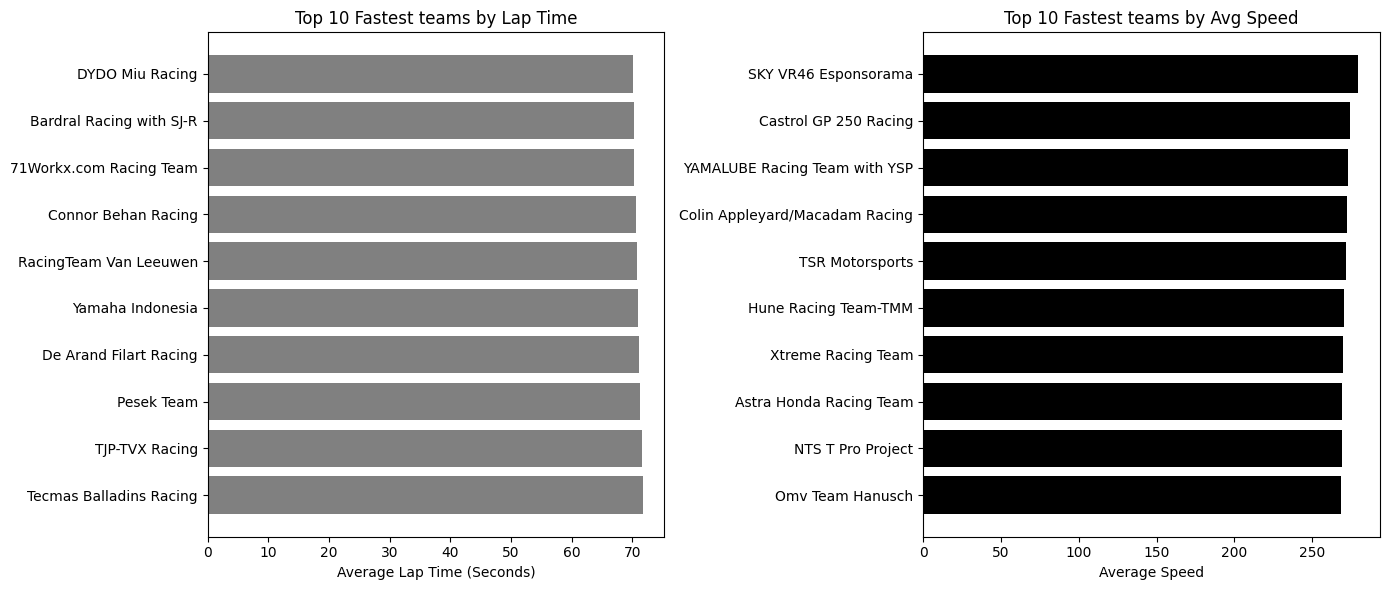

In [ ]:

# Get top 10 fastest bikes by average lap time
lap_time_df = df.groupby('team_name').mean().sort_values(by='Lap_Time_Seconds' , ascending=True).head(10)

# Get average speeds for the same bikes
speed_df = df.groupby('team_name').mean().sort_values(by='Avg_Speed_kmh' , ascending=False).head(10)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot lap time
axes[0].barh(lap_time_df.index, lap_time_df['Lap_Time_Seconds'], color='grey')
axes[0].set_xlabel('Average Lap Time (Seconds)')
axes[0].set_title('Top 10 Fastest teams by Lap Time')
axes[0].invert_yaxis()

# Plot average speed
axes[1].barh(speed_df.index, speed_df['Avg_Speed_kmh'], color='black')
axes[1].set_xlabel('Average Speed')
axes[1].set_title('Top 10 Fastest teams by Avg Speed')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


- DYDO Miu Racing , and Bardal Racing have lowest Lap Time among all other teams.
- SKY VR46 Esponsorama have fastes avg speed. 

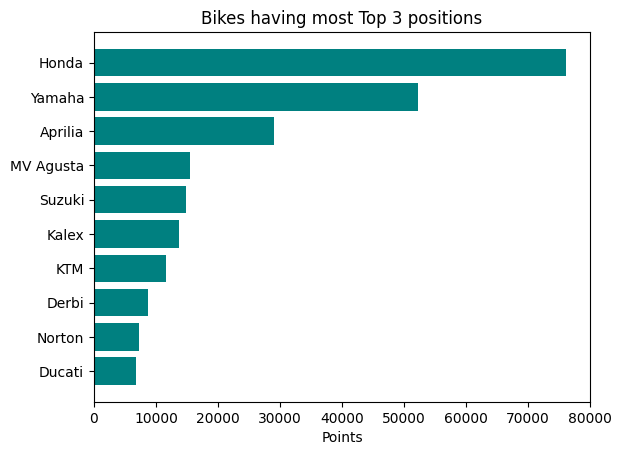

In [ ]:
# Bikes Securing top 3 positions

bike_top_3 = df[(df['position'] <=3) & (df['position']  > 0)].groupby('bike_name')['position'].count().sort_values(ascending=False).head(10)

plt.barh(y = bike_top_3.index, width= bike_top_3.values, color='teal')
plt.xlabel('Points')
plt.title('Bikes having most Top 3 positions')
plt.gca().invert_yaxis()
plt.show()


- Honda is most succesful bike securing most top 3 positions.
- Yamaha and Aprilia seats 2nd and 3rd respectively.

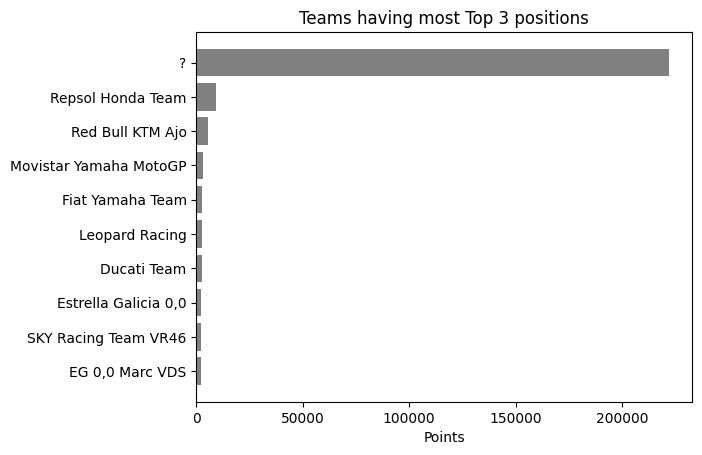

In [ ]:
# Teams Securing top 3 positions

team_top_3 = df[(df['position'] <=3) & (df['position']  > 0)].groupby('team_name')['position'].count().sort_values(ascending=False).head(10)

plt.barh(y = team_top_3.index, width= team_top_3.values, color='grey')
plt.xlabel('Points')
plt.title('Teams having most Top 3 positions')
plt.gca().invert_yaxis()
plt.show()


- In the given dataset there are unknown teams described by '?' sign.
- If we take these teams out of feature than:
    - Repsol Honda is most succesful Team followd by Red Bull KTM and than Movistart Yamaha.

#### Riders

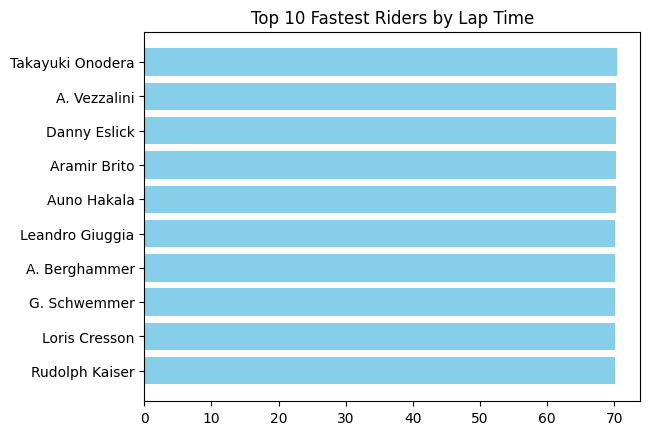

In [ ]:
lap_time_df = df.groupby('rider_full_name')['Lap_Time_Seconds'].mean().sort_values(ascending=True).head(10)
# Create side-by-side plots
# Plot lap time
plt.barh(lap_time_df.index, lap_time_df.values, color='skyblue')
plt.title('Top 10 Fastest Riders by Lap Time')
plt.show()

- Fastest rider by lap time are takayuki onodera , Vexxalini and Danny Eslick.
- Diffrence is very less between all top 10 riders.

C:\Users\windows\AppData\Local\Temp\ipykernel_20848\2720136888.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rider_stats = df_rider_stats.groupby('rider_full_name').mean()


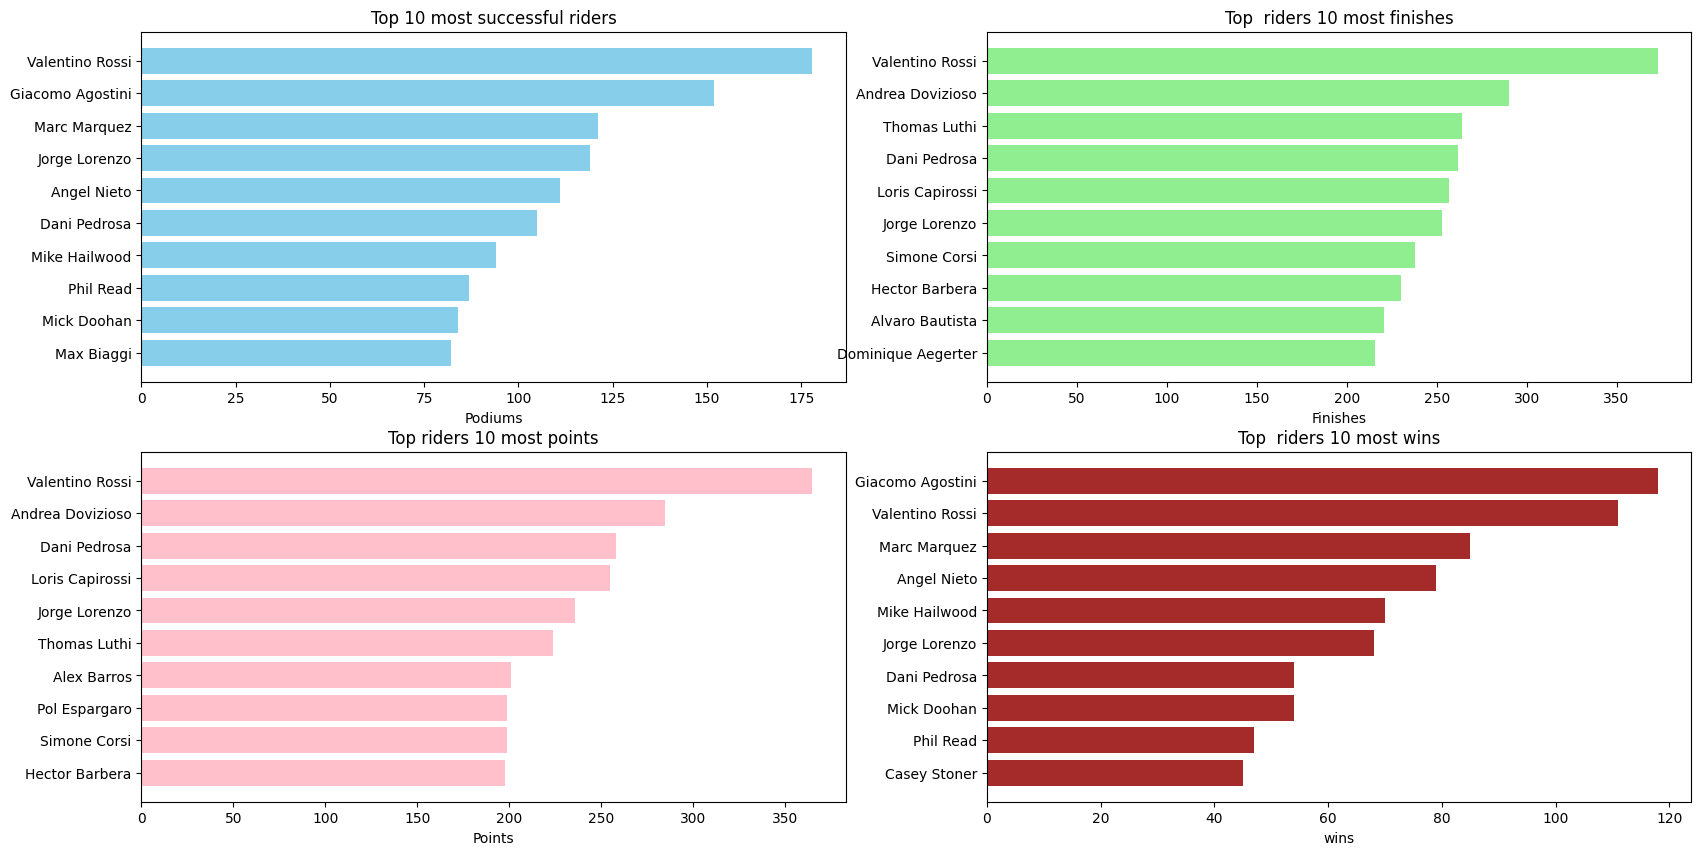

In [ ]:
df_rider_stats = df.loc[ :, 'starts':'rider_full_name']
df_rider_stats = df_rider_stats.groupby('rider_full_name').mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 10) , )

temp_df = df_rider_stats.sort_values(by='podiums' , ascending=False).head(10)
temp_df
# Plot Podiumns
axes[0 , 0].barh(temp_df.index, temp_df.podiums, color='skyblue')
axes[0 , 0].set_xlabel('Podiums')
axes[0 , 0].set_xlabel('Podiums')
axes[0 , 0].set_title('Top 10 most successful riders')
axes[0 , 0].invert_yaxis()

temp_df = df_rider_stats.sort_values(by='finishes' , ascending=False).head(10)
temp_df
# Plot Podiumns
axes[0 , 1].barh(temp_df.index, temp_df.finishes, color='lightgreen')
axes[0 , 1].set_xlabel('Finishes')
axes[0 , 1].set_title('Top  riders 10 most finishes')
axes[0 , 1].invert_yaxis()

temp_df = df_rider_stats.sort_values(by='with_points' , ascending=False).head(10)
temp_df
# Plot Points
axes[1 , 0].barh(temp_df.index, temp_df.with_points, color='pink')
axes[1 , 0].set_xlabel('Points')
axes[1 , 0].set_title('Top riders 10 most points')
axes[1 , 0].invert_yaxis()

temp_df = df_rider_stats.sort_values(by='wins' , ascending=False).head(10)
temp_df
# Plot Wins
axes[1 , 1].barh(temp_df.index, temp_df.wins, color='brown')
axes[1 , 1].set_xlabel('wins')
axes[1 , 1].set_title('Top  riders 10 most wins')
axes[1 , 1].invert_yaxis()

* Valentino Rossi consistently appears in the top rankings across all categories: successful riders, most finishes, most points, and most wins.
* Giacomo Agostini is prominent in the "Top 10 most successful riders" and "Top riders 10 most wins" charts.
* The "Top riders 10 most finishes" and "Top riders 10 most points" graphs show some overlap in riders like Andrea Dovizioso, Dani Pedrosa, and Jorge Lorenzo.
* While Valentino Rossi leads in podiums, wins, finishes, and points, other riders like Marc Marquez and Angel Nieto also have a strong presence in the "wins" and "successful riders" categories.
* The graphs highlight the long and successful careers of riders such as Valentino Rossi, demonstrating their dominance across various performance metrics.

#### Penalties

In [ ]:
df['Penalty'].unique()

array(['+3s', '+5s', 'DNF', 'DNS', 'Ride Through', 'None'], dtype=object)

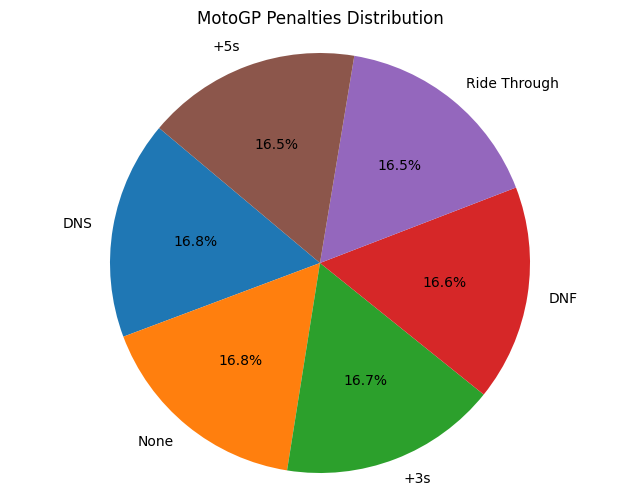

In [ ]:
# DNF analysis
# Percentage analysis

penalty_counts =  df['Penalty'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(penalty_counts.values, labels=penalty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('MotoGP Penalties Distribution')
plt.axis('equal')  # Equal aspect ratio to keep it circular
plt.show()

# The riders failed to finish the race 16.6% of times and they were not able to start the race 16.8% of time.

Penalty distribution is almost equal in all categories.

In [ ]:
# Teams prone to DNF
penalty_rider_counts =  df[(df['category_x'] =="MotoGP")].groupby('team_name')['Penalty'].value_counts()
riders = df['team_name'].unique()

rider_dnf = {}

for rider in riders:
    try:
        rider_dnf[rider] = penalty_rider_counts[(rider , 'DNF')]
    except:
        pass

In [ ]:
pd.DataFrame(data=list(rider_dnf.items()) , columns=['Teams' , "DNFs"] ).sort_values(by="DNFs" , ascending=False).head()

,Teams,DNFs
1,?,59586
51,Repsol Honda Team,1117
3,Red Bull KTM Ajo,990
80,SKY Racing Team VR46,803
15,Ducati Team,738


The Count shown in the data is doubtful

#### Circuits

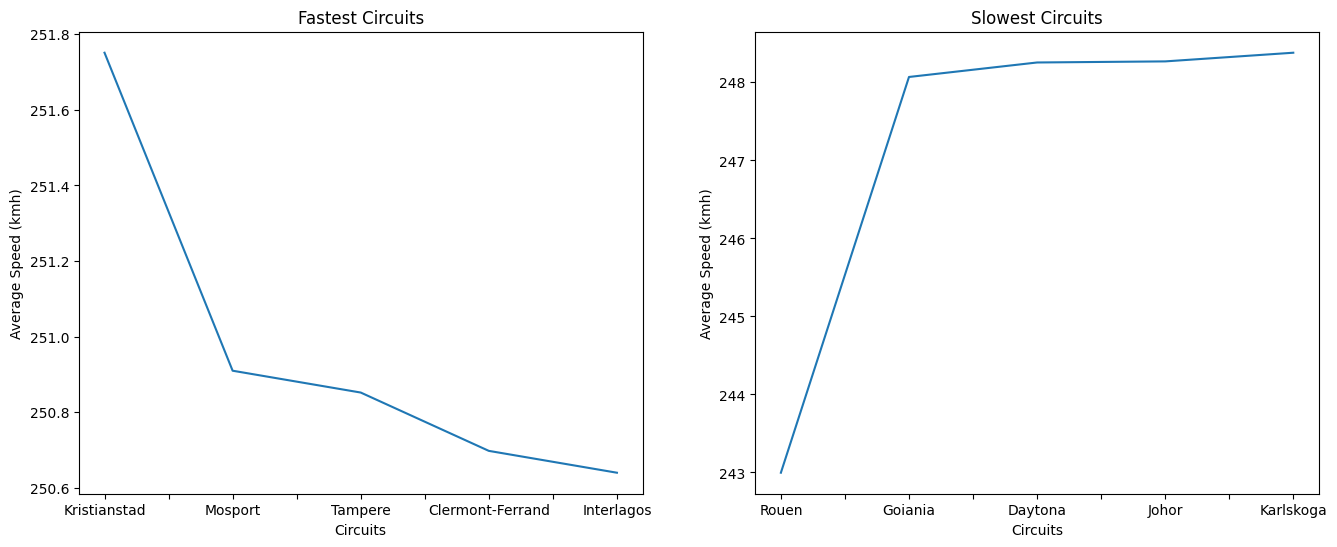

In [ ]:
# Circuit Analysis

fig, axes = plt.subplots(1, 2, figsize=(16, 6)  )
df.groupby('circuit_name')['Avg_Speed_kmh'].describe().sort_values('mean' , ascending=False).head(5)['mean'].plot(ax=axes[0])
axes[0].set_title("Fastest Circuits")
axes[0].set_xlabel('Circuits')
axes[0].set_ylabel('Average Speed (kmh)')

df.groupby('circuit_name')['Avg_Speed_kmh'].describe().sort_values('mean' , ascending=True).head(5)['mean'].plot(ax=axes[1])
axes[1].set_title("Slowest Circuits")
axes[1].set_xlabel('Circuits')
axes[1].set_ylabel('Average Speed (kmh)')

plt.show()

* Kristianstad is shown as the fastest circuit with the highest average speed, while Interlagos is the slowest among the "Fastest Circuits."
* Among the "Slowest Circuits," Rouen has the lowest average speed, with Karlskoga, Johor, and Daytona being the slowest.

### Time Series

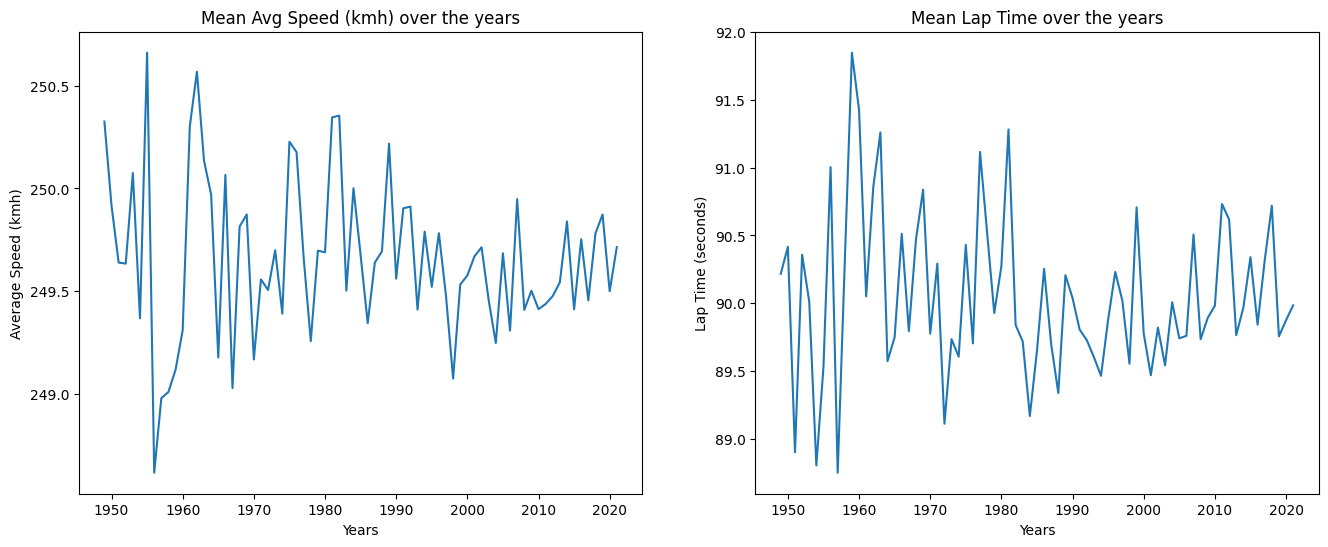

In [ ]:
# Lap Time and Avg Speed over the years

fig, axes = plt.subplots(1, 2, figsize=(16, 6)  )
df.groupby('year_x')['Avg_Speed_kmh'].mean().plot(ax=axes[0])
axes[0].set_title("Mean Avg Speed (kmh) over the years")
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Average Speed (kmh)')

df.groupby('year_x')['Lap_Time_Seconds'].mean().plot(ax=axes[1])
axes[1].set_title("Mean Lap Time over the years")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Lap Time (seconds)')

plt.show()

* The "Mean Avg Speed (kmh) over the years" graph shows significant fluctuations in average speeds, with no clear long-term increasing or decreasing trend.
* Similarly, the "Mean Lap Time (seconds) over the years" graph also exhibits considerable year-to-year variability in lap times.
* There appears to be an inverse relationship between the two graphs; generally, when average speeds are higher, lap times tend to be lower, which is expected.
* Both graphs indicate that there isn't a consistent improvement or decline in either average speed or lap times across the entire period shown (roughly 1950s to 2020s).
* The data suggests that yearly performance metrics like average speed and lap time are influenced by various factors that cause them to oscillate rather than follow a steady trajectory.

### Numerical vs Numerical

#### Lap Time Variability

C:\Users\windows\AppData\Local\Temp\ipykernel_20848\3426989683.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lap_stds =  df[df['Session'] == "Race"].groupby('rider_full_name').std()['Lap_Time_Seconds']
C:\Users\windows\AppData\Local\Temp\ipykernel_20848\3426989683.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rider_podiums = df[df['Session'] == "Race"].groupby('rider_full_name').mean()['podiums']


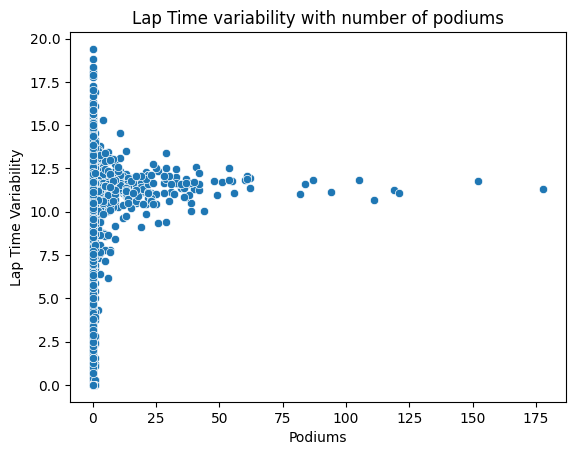

In [ ]:
# df[[ 'rider_full_name', 'podiums' , 'Lap_Time_Seconds']]
lap_stds =  df[df['Session'] == "Race"].groupby('rider_full_name').std()['Lap_Time_Seconds']
rider_podiums = df[df['Session'] == "Race"].groupby('rider_full_name').mean()['podiums']

sns.scatterplot(x = rider_podiums.values , y = lap_stds.values)
plt.xlabel("Podiums")
plt.ylabel("Lap Time Variability")
plt.title("Lap Time variability with number of podiums")
plt.show()

# Lap time vriation is between 10.0 to 15.0 seconds range in podium winning riders.
# The riders with no podiums have varied range from 0 to 20 seconds.    

* The graph generally shows that as the number of podiums increases, the lap time variability tends to decrease, suggesting more consistent performance from highly successful riders.
* There's a high concentration of data points at the lower end of podiums (0 to approximately 25), indicating many riders achieve few podiums but exhibit a wide range of lap time variability.
* For riders with very few podiums (close to 0), the lap time variability spans a wide range, from nearly 0 to almost 20.
* As the number of podiums exceeds roughly 25-30, the spread in lap time variability narrows considerably, mostly staying between 10 and 12.5.
* There are a few outliers with a very high number of podiums (e.g., around 150 and 180) that still show lap time variability similar to riders with a moderate number of podiums.

#### Hypothesis : Does grid position affects final position ?

 We Assume this null hypothesis
 - H₀: Grid position significantly affects final position.

In [ ]:
# Use Spearman (rank-based, safer for ordinal data)
corr, p_value = spearmanr(df['Grid_Position'], df['position'])

print(f"Spearman correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject H₀: Grid position significantly affects final position.")
else:
    print("Fail to reject H₀: No significant relationship found.")


Spearman correlation: 0.00043727029500821633
P-value: 0.5452052299583474
Fail to reject H₀: No significant relationship found.


# Feature Engineering

In [ ]:
df.columns

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition_surface',
       'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track_temperature', 'air', 'ground', 'starts', 'finishes',
       'with_points', 'podiums', 'wins', 'min_year', 'max_year',
       'years_active', 'rider_fname', 'rider_lname', 'rider_full_name'],
      dtype='object')

In [ ]:
df.head()

,Unique ID,Rider_ID,category_x,Circuit_Length_km,Laps,Grid_Position,Avg_Speed_kmh,Track_Condition_surface,Humidity_%,Tire_Compound_Front,Tire_Compound_Rear,Penalty,Championship_Points,Championship_Position,Session,year_x,sequence,rider,team,bike,position,points,shortname,circuit_name,rider_name,team_name,bike_name,Lap_Time_Seconds,Corners_per_Lap,Tire_Degradation_Factor_per_Lap,Pit_Stop_Duration_Seconds,Ambient_Temperature_Celsius,Track_Temperature_Celsius,weather,track_temperature,air,ground,starts,finishes,with_points,podiums,wins,min_year,max_year,years_active,rider_fname,rider_lname,rider_full_name
0,1894944,2659,Moto2,4.874,22,17,264.66,Wet,61,Hard,Hard,+3s,100,20,FP3,2021,16,2639,615,258,9,7.0,EMI,Misano,"Ogura, Ai",IDEMITSU Honda Team Asia,Kalex,70.667,18,0.0042,4.09,23.0,27.3,Clear,Dry,23,35,53,45,41,4,0,2018,2021,4,Ai,Ogura,Ai Ogura
1,23438,5205,Moto2,3.875,24,7,177.56,Wet,77,Soft,Medium,+5s,137,7,Race,1977,4,900,1,4,5,6.0,NAT,Imola,"North, Alan",?,Yamaha,103.497,23,0.0025,4.64,34.3,41.8,Raining,Wet,12,12,27,27,22,2,1,1975,1983,8,Alan,North,Alan North
2,939678,7392,Moto3,5.647,25,5,317.74,Dry,87,Soft,Hard,DNF,43,17,Race,1985,2,1160,1,2,10,1.0,SPA,Jarama,"Biliotti, Fabio",?,Honda,78.400,19,0.0044,2.67,20.6,27.1,Cloudy,Dry,22,23,45,43,10,0,0,1982,1989,8,Fabio,Biliotti,Fabio Biliotti
3,1196312,7894,Moto3,4.810,19,3,321.82,Wet,43,Soft,Hard,DNS,234,13,Race,2007,16,1693,206,15,11,5.0,AUS,Phillip Island,"Locatelli, Roberto",Metis Gilera,Gilera,81.338,12,0.0034,4.69,20.9,29.1,Clear,Dry,23,35,192,172,155,16,9,1994,2009,16,Roberto,Locatelli,Roberto Locatelli
4,1033899,6163,MotoGP,5.809,25,21,239.92,Wet,47,Hard,Medium,DNS,306,8,FP3,2018,7,2450,568,6,6,10.0,CAT,Catalunya,"Binder, Brad",Red Bull KTM Ajo,KTM,108.626,23,0.0017,4.84,29.1,43.4,Cloudy,Dry,22,31,175,146,132,29,17,2011,2021,11,Brad,Binder,Brad Binder


In [ ]:
df['Temp_diff'] = df['Track_Temperature_Celsius'] - df['Ambient_Temperature_Celsius']
df['Humidity_to_grip'] = df['Humidity_%'] / df['Corners_per_Lap']
df['Degradation_Impact'] = df['Tire_Degradation_Factor_per_Lap'] * df['Laps']
df["secs_per_km"] = (df["Circuit_Length_km"] / df["Avg_Speed_kmh"]) * 3600
df['tire_combo'] = df['Tire_Compound_Front'] +"_" +df["Tire_Compound_Rear"]
df['is_wet'] = df['Track_Condition_surface'].apply(lambda x : 0 if x =="Dry" else 1 )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914056 entries, 0 to 1914055
Data columns (total 54 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unique ID                        int64  
 1   Rider_ID                         int64  
 2   category_x                       object 
 3   Circuit_Length_km                float64
 4   Laps                             int64  
 5   Grid_Position                    int64  
 6   Avg_Speed_kmh                    float64
 7   Track_Condition_surface          object 
 8   Humidity_%                       int64  
 9   Tire_Compound_Front              object 
 10  Tire_Compound_Rear               object 
 11  Penalty                          object 
 12  Championship_Points              int64  
 13  Championship_Position            int64  
 14  Session                          object 
 15  year_x                           int64  
 16  sequence                         int64  
 17  rider   

### Prepare Data

In [ ]:
df.columns

Index(['Unique ID', 'Rider_ID', 'category_x', 'Circuit_Length_km', 'Laps',
       'Grid_Position', 'Avg_Speed_kmh', 'Track_Condition_surface',
       'Humidity_%', 'Tire_Compound_Front', 'Tire_Compound_Rear', 'Penalty',
       'Championship_Points', 'Championship_Position', 'Session', 'year_x',
       'sequence', 'rider', 'team', 'bike', 'position', 'points', 'shortname',
       'circuit_name', 'rider_name', 'team_name', 'bike_name',
       'Lap_Time_Seconds', 'Corners_per_Lap',
       'Tire_Degradation_Factor_per_Lap', 'Pit_Stop_Duration_Seconds',
       'Ambient_Temperature_Celsius', 'Track_Temperature_Celsius', 'weather',
       'track_temperature', 'air', 'ground', 'starts', 'finishes',
       'with_points', 'podiums', 'wins', 'min_year', 'max_year',
       'years_active', 'rider_fname', 'rider_lname', 'rider_full_name',
       'Temp_diff', 'Humidity_to_grip', 'Degradation_Impact', 'secs_per_km',
       'tire_combo', 'is_wet'],
      dtype='object')

In [ ]:
# We are dropping rider related columns.
# also some unrelated columns like Unique ID
# columns related to championships are also dropped
df = df.drop(columns=[
    'Unique ID',"Rider_ID",'rider_name',
    'rider_fname', 'rider_lname','min_year', 'max_year',
       'position' , 'points' , "Penalty"
])

In [ ]:
# mapping and storing rider name with there ids
rider_name_mp = {}
for row in df[['rider_full_name' , 'rider']].values:
    rider_name_mp[row[1]] = row[0]
print(rider_name_mp)

{2639: 'Ai Ogura', 900: 'Alan North', 1160: 'Fabio Biliotti', 1693: 'Roberto Locatelli', 2450: 'Brad Binder', 2158: 'Andrea Iannone', 2288: 'Scott Redding', 1126: 'Martin Wimmer', 2037: 'Mika Kallio', 1578: 'Adrian Bosshard', 1988: 'Hector Faubel', 1016: 'Carlos Lavado', 2383: 'Yonny Hernandez', 2331: 'Cameron Beaubier', 1619: 'Jeremy Mcwilliams', 1684: 'Emilio Alzamora', 2032: 'Casey Stoner', 288: 'Hugh Anderson', 1342: 'Kevin Magee', 2587: 'Fabio Di Giannantonio', 2160: 'Karel Abraham', 1131: 'Maurizio Vitali', 1903: 'Klaus Nöhles', 1565: 'Eskil Suter', 1657: 'Jaroslav Hules', 2569: 'Stefano Manzi', 2273: 'Ricard Cardus', 1783: 'Sebastien Gimbert', 2653: 'Can Oncu', 2107: 'Michele Pirro', 1426: 'Gabriele Gnani', 1854: 'Marco Melandri', 2644: 'Stefano Nepa', 461: 'Kel Carruthers', 1115: 'Didier De Radigues', 1567: 'Max Biaggi', 1159: 'Jorge Martinez', 2098: 'Mike Di Meglio', 2580: 'Davide Pizzoli', 609: 'Penti Korhonen', 2130: 'Mattia Pasini', 1645: 'Pere Riba', 2330: 'Johann Zarco', 

In [ ]:
# mapping and storing bike name with there ids
bike_name_mp = {}
for row in df[['bike_name' , 'bike']].values:
    bike_name_mp[row[1]] = row[0]
print(bike_name_mp)

{258: 'Kalex', 4: 'Yamaha', 2: 'Honda', 15: 'Gilera', 6: 'KTM', 7: 'Aprilia', 3: 'Ducati', 216: 'ROC Yamaha', 5: 'Suzuki', 243: 'Suter', 255: 'Tech3', 221: 'TSR', 142: 'Rieju', 45: 'Aermacchi', 271: 'FTR Honda', 232: 'Moriwaki', 149: 'MBA', 24: 'Norton', 47: 'Bultaco', 272: 'Kalex KTM', 175: 'Krauser', 43: 'MZ', 16: 'Harley Davidson', 201: 'Defi', 80: 'Garelli', 291: 'Avintia', 62: 'Derbi', 303: 'Boscoscuro', 246: 'Speed Up', 302: 'Energica', 19: 'Kawasaki', 50: 'Kreidler', 244: 'FTR', 21: 'Moto Guzzi', 273: 'Suter Honda', 254: 'MZ-RE Honda', 261: 'Mahindra', 55: 'Maico', 264: 'ART', 38: 'Matchless', 191: 'Tunturi', 206: 'Fantic', 9: 'MV Agusta', 84: 'Villa', 247: 'Pons Kalex', 88: 'Morbidelli', 179: 'Casal', 28: 'Mondial', 65: 'Husqvarna', 296: 'NTS', 181: 'Starol', 18: 'Jawa-CZ', 13: 'Cagiva', 251: 'ADV', 293: 'Caterham Suter', 282: 'PBM', 233: 'Blata', 164: 'ELF', 252: 'BQR-Moto2', 26: 'Rudge', 172: 'JJ Cobas', 60: 'Paton', 148: 'Motobecane', 92: 'Minarelli', 97: 'Malanca', 73: 'Lin

In [ ]:
# mapping and storing team name with there ids
team_name_mp = {}
for row in df[['team_name' , 'team']].values:
    team_name_mp[row[1]] = row[0]
print(team_name_mp)

{615: 'IDEMITSU Honda Team Asia', 1: '?', 206: 'Metis Gilera', 568: 'Red Bull KTM Ajo', 24: 'Abruzzo Racing Team', 208: 'Blusens Aprilia', 412: 'Pramac Racing Team', 508: 'Bankia Aspar Team 125cc', 723: 'Octo Pramac Racing', 363: 'Red Bull KTM Motosport', 8: 'Ducati Marlboro Team', 748: 'Gresini Racing Moto3', 777: 'Pull&Bear Aspar Team', 778: 'Forward Racing Team', 612: 'Tech 3', 81: 'Ducati Team', 915: 'Gaviota Aspar Team Moto3', 233: 'Kopron Team Scot', 910: 'BOE Skull Rider Facile Energy', 40: 'Totti Top Sport - NGS', 330: 'WTR San Marino Team', 619: 'Ongetta-Rivacold', 496: 'QMMF Racing Team', 569: 'Estrella Galicia 0,0', 861: 'Sama Qatar Angel Nieto Team', 197: 'Fiat Yamaha Team', 516: 'Phonica Racing', 852: 'Monster Energy Yamaha MotoGP', 427: 'Marc VDS Racing Team', 637: 'Aspar Team Moto2', 869: 'VNE Snipers', 813: 'LCR Honda CASTROL', 209: 'Team Sicilia', 203: 'Team Toth Aprilia', 280: 'Lotus Aprilia', 410: 'Interwetten Honda MotoGP', 311: 'Junior GP Racing Dream', 287: 'Auto 

In [ ]:
# changing dtype of the year column
df['year_x'] = pd.to_datetime(df['year_x'], format='%Y').dt.year

In [ ]:
# changing data type from object to category

cat_cols = df.select_dtypes(include=['object'])

for col in cat_cols:
    df[col] = df[col].astype('category')
    

In [ ]:
# convert cahmpionship position to categorical data type 

df['Championship_Position'] = df['Championship_Position'].astype('category')

In [ ]:
# dropping these categorical columns
df_numerical_verion = df.drop(columns=[
    "team_name" , "bike_name" , "rider_full_name" 
])

In [ ]:
# dropping these numerical columns
df_categorical_version = df.drop(columns=[
    "team" , "bike" , "rider" 
])

In [ ]:
# writing function to clean test and validation df
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LeakyReLU

def clean_data(df):
    df['rider_fname'] = df['rider_name'].apply(lambda x: x.split(',')[1])
    df['rider_fname'] = df['rider_fname'].str.strip()
    df['rider_lname'] = df['rider_name'].apply(lambda x: x.split(',')[0])
    df['rider_full_name'] = df['rider_fname'] + " " +df['rider_lname']

    df.rename(columns={'Track_Condition':'Track_Condition_surface' , 
                'track':'track_temperature'},
                    inplace=True )
    
    df['Temp_diff'] = df['Track_Temperature_Celsius'] - df['Ambient_Temperature_Celsius']
    df['Humidity_to_grip'] = df['Humidity_%'] / df['Corners_per_Lap']
    df['Degradation_Impact'] = df['Tire_Degradation_Factor_per_Lap'] * df['Laps']
    df["secs_per_km"] = (df["Circuit_Length_km"] / df["Avg_Speed_kmh"]) * 3600
    df['tire_combo'] = df['Tire_Compound_Front'] +"_" +df["Tire_Compound_Rear"]
    df['is_wet'] = df['Track_Condition_surface'].apply(lambda x : 0 if x =="Dry" else 1 )

    df = df.drop(columns=[
                "Rider_ID",'rider_name',
                'rider_fname', 'rider_lname','min_year', 'max_year',
                'position' , 'points' , "Penalty"
    ])

    df['year_x'] = pd.to_datetime(df['year_x'], format='%Y').dt.year

    unique_id = df['Unique ID']
    df = df.drop(columns=['Unique ID'])

    cat_cols = df.select_dtypes(include=['object'])

    for col in cat_cols:
        df[col] = df[col].astype('category')

    df['Championship_Position'] = df['Championship_Position'].astype('category')

    return df , unique_id


def preprocess_data(df , le):
    cat_cols = df.select_dtypes(include="category").columns

    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
    
    return df

def data_split(df):
    X = df.drop(columns=['Lap_Time_Seconds'])
    y = df['Lap_Time_Seconds']

    return X , y


def data_scaler(X , y , x_scaler , y_scaler):
    
    X_scaled = x_scaler.fit_transform(X)
    y_scaled = y_scaler.fit_transform(np.array(y).reshape(-1, 1))

    return X_scaled , y_scaled

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_trainer(models , X_train , y_train , X_test , y_test):
    for model_name , model in models.items():
        model.fit(X_train , y_train) 
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        print("Model : " , model_name)
        print("Training Score : " , rmse(y_train , y_pred_train))
        print("Testing Score : " , rmse(y_test , y_pred_test))

def NN_trainer(model , X_scaled, y_scaled  ):
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

    history = model.fit(X_scaled , y_scaled , epochs=55 , validation_split=0.2 ,  batch_size=271356 )

    return model , history

def NN_result( model,X_test , y_test , X_scaler , y_scaler):

    X_test = X_scaler.transform(X_test)

    y_pred_test = y_scaler.inverse_transform(model.predict(X_test))

    print("Test Score :" , rmse(y_test ,y_pred_test ))





# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler , OneHotEncoder , StandardScaler , OrdinalEncoder , LabelEncoder  
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
test_df , test_df_id = clean_data(df=pd.read_csv('dataset/test.csv'))
val_df , val_df_id = clean_data(df=pd.read_csv('dataset/val.csv'))

In [ ]:
df_categorical_version.shape

(1914056, 41)

In [ ]:
## Using traditional models without preprocessing becasue we are using gradient models
# first we are using XGB and LGBM models
model_df = df_categorical_version.copy()
val_df_cat = val_df.drop(columns=[
    "team" , "bike" , "rider" 
])

# defining train and test sets
X_train , y_train = data_split(model_df)
X_test , y_test = data_split(val_df_cat)

# training and results
models = {
    'LGBM' : LGBMRegressor(random_state = 42),
    'xgb' : XGBRegressor(enable_categorical=True , 
                          tree_method='hist',       
                        use_label_encoder=False  ,
                         ),
                         }

model_trainer(models , X_train , y_train , X_test , y_test)

Model :  LGBM
Training Score :  10.175349630683025
Testing Score :  10.195779508465893
Model :  xgb
Training Score :  8.317407387006053
Testing Score :  13.969858474101702


In [ ]:
## defining Neural Network
model = Sequential()
model.add(Dense(40, input_dim=40 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))  # alpha controls the negative slope

model.add(Dense(40 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(28 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(16 ,kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(8 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(4 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(2 , kernel_initializer = "he_normal"))
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1))  # Output layer (no activation for regression)

print(model.summary())


C:\Users\windows\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\windows\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,077 (19.83 KB)

 Trainable params: 5,077 (19.83 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
## Training with Neural Networks

# loading numerical version for easy preprocessing
le = LabelEncoder()
model_df = preprocess_data(df_numerical_verion , le=le)
val_df_num = val_df.drop(columns=[
    "team_name" , "bike_name" , "rider_full_name" 
])
val_df_num = preprocess_data(df=val_df_num , le=le)



# splitting data into features and targets
X , y = data_split(model_df)
X_test  , y_test = data_split(val_df_num)

# initiate scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# scaling data
X_scaled , y_scaled =  data_scaler(X , y , x_scaler , y_scaler)

# training NN
model , history = NN_trainer(model=model , X_scaled=X_scaled , y_scaled = y_scaled)

NN_result(model , X_test , y_test , x_scaler , y_scaler)

Epoch 1/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 571ms/step - loss: 1.0060 - root_mean_squared_error: 1.0030 - val_loss: 1.0021 - val_root_mean_squared_error: 1.0010
Epoch 2/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - loss: 1.0007 - root_mean_squared_error: 1.0004 - val_loss: 1.0011 - val_root_mean_squared_error: 1.0006
Epoch 3/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - loss: 1.0003 - root_mean_squared_error: 1.0002 - val_loss: 1.0010 - val_root_mean_squared_error: 1.0005
Epoch 4/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - loss: 0.9999 - root_mean_squared_error: 0.9999 - val_loss: 1.0010 - val_root_mean_squared_error: 1.0005
Epoch 5/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - loss: 0.9999 - root_mean_squared_error: 1.0000 - val_loss: 1.0010 - val_root_mean_squared_error: 1.0005
Epoch 6/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - loss: 1.0002 - root_mean_squared_error: 1.0001 - val_loss: 1.0009 - val_root_mean_squared_error: 1.0005
Epoch 7/55
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - loss: 0.9995

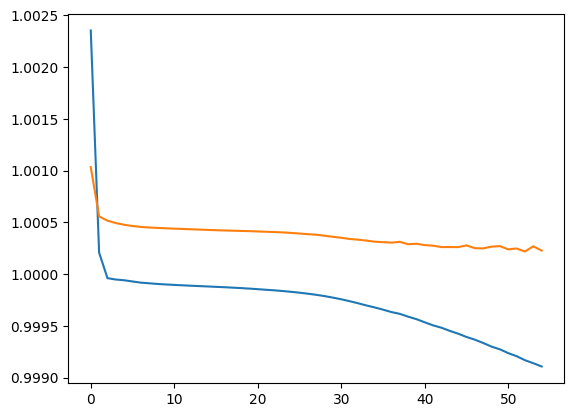

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.show()

# Finetuning - XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

model_df = df_categorical_version.copy()
val_df_cat = val_df.drop(columns=[
    "team" , "bike" , "rider" 
])

# defining train and test sets
X_train , y_train = data_split(model_df)
X_test , y_test = data_split(val_df_cat)

# Define your parameter grid (choose fewer combinations to keep it fast)
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 1],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 3],
    'min_child_weight': [1, 5],
}

# Define the model
xgb = XGBRegressor(
    tree_method='hist',              # required for categorical support
    enable_categorical=True,
    verbosity=1,
    n_jobs=-1                        # parallel computation
)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,                            # 3-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:\n", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)  # negative because of scoring

# Final evaluation on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = rmse(y_test , y_pred)
print("Test RMSE:", test_rmse)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


MemoryError: Unable to allocate 156. MiB for an array with shape (16, 1276037) and data type int64

In [ ]:
# pd.DataFrame({
#     'Unique ID': np.array(test_df_id),
#     'Lap_Time_Seconds': y_val_pred.reshape(-1)
# }).to_csv("submission.csv" , index=False)